In [86]:
#final script

In [87]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

In [88]:
employment_data = pd.read_csv("./Data/Unemployment and Household Income 2007-08.csv")
employment_data = employment_data.iloc[7:,]
employment_data = employment_data.rename(columns={"Unemployment and median household income for the U.S., States, and counties, 2007-18":"Unemployment Rate","Unnamed: 1": "State", "Unnamed: 2": "County/State","Unnamed: 3":"Rural 2013","Unnamed: 4":"Urban 2013","Unnamed: 5":"Metro 2013","Unnamed: 6":"CLF 2007","Unnamed: 7":"Emp 2007","Unnamed: 8":"Unemp 2007","Unnamed: 9":"Unemp Rate 2007","Unnamed: 10":"CLF 2008","Unnamed: 11":"Emp 2008","Unnamed: 12":"Unemp 2008","Unnamed: 13":"Unemp Rate 2008","Unnamed: 14":"CLF 2009","Unnamed: 15":"Emp 2009","Unnamed: 16":"Unemp 2009","Unnamed: 17":"Unemp Rate 2009","Unnamed: 18":"CLF 2010","Unnamed: 19":"Emp 2010","Unnamed: 20":"Unemp 2010","Unnamed: 21":"Unemp Rate 2010","Unnamed: 22":"CLF 2011","Unnamed: 23":"Emp 2011","Unnamed: 24":"Unemp 2011","Unnamed: 25":"Unemp Rate 2011","Unnamed: 26":"CLF 2012","Unnamed: 27":"Emp 2012","Unnamed: 28":"Unemp 2012","Unnamed: 29":"Unemp Rate 2012","Unnamed: 30":"CLF 2013","Unnamed: 31":"Emp 2013","Unnamed: 32":"Unemp 2013","Unnamed: 33":"Unemp Rate 2013","Unnamed: 34":"CLF 2014","Unnamed: 35":"Emp 2014","Unnamed: 36":"Unemp 2014","Unnamed: 37":"Unemp Rate 2014","Unnamed: 38":"CLF 2015","Unnamed: 39":"Emp 2015","Unnamed: 40":"Unemp 2015","Unnamed: 41":"Unemp Rate 2015","Unnamed: 42":"CLF 2016","Unnamed: 43":"Emp 2016","Unnamed: 44":"Unemp 2016","Unnamed: 45":"Unemp Rate 2016","Unnamed: 46":"CLF 2017","Unnamed: 47":"Emp 2017","Unnamed: 48":"Unemp 2017","Unnamed: 49":"Unemp Rate 2017","Unnamed: 50":"CLF 2018","Unnamed: 51":"Emp 2018","Unnamed: 52":"Unemp 2018","Unnamed: 53":"Unemp Rate 2018", "Unnamed: 54": "Median Household Income 2017", "Unnamed: 55": "Median HH Income (%) 2017"})
employment_data = employment_data.drop(["Unemployment Rate","Rural 2013", "Urban 2013", "Metro 2013"], axis=1)
employment_data_only = employment_data.drop(["Median Household Income 2017", "Median HH Income (%) 2017"], axis=1)
employment_data = employment_data.set_index("State")
employment_data = employment_data.drop('PR')

employment_data_only = employment_data_only.set_index("State")
employment_data_only = employment_data_only.drop('PR')
employment_data_only = employment_data_only.fillna('-')
employment_data = employment_data.fillna('-')

In [89]:
def parseFloat(data):
    parsedData = re.sub( '[^\d\.]', '', data)
    return (re.sub( '[^\d\.]', '', data)) if parsedData else 0
employment_d = employment_data_only.iloc[:,1:].applymap(parseFloat)
e = employment_d.astype('float')
e['County/State'] = employment_data_only['County/State']

In [90]:
state_abrev = ["AL", 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS','KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
states = ["Alabama", 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas','Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [91]:
def us_unemployment(source):
    return source[["Unemp Rate 2007", "Unemp Rate 2008", 'Unemp Rate 2009',"Unemp Rate 2010", "Unemp Rate 2011", 'Unemp Rate 2012',"Unemp Rate 2013", "Unemp Rate 2014", 'Unemp Rate 2015',"Unemp Rate 2016", "Unemp Rate 2017", 'Unemp Rate 2018']]
us_data = e.iloc[:1]
us_unemployment = us_unemployment(us_data)

In [92]:
def parse_employment_data(state):
    return e.loc[e['County/State']== state]


In [93]:
def state_unemp(source):
    state = e_states.loc[e_states['County/State'] == source]
    return state[["Unemp Rate 2007", "Unemp Rate 2008", 'Unemp Rate 2009',"Unemp Rate 2010", "Unemp Rate 2011", 'Unemp Rate 2012',"Unemp Rate 2013", "Unemp Rate 2014", 'Unemp Rate 2015',"Unemp Rate 2016", "Unemp Rate 2017", 'Unemp Rate 2018']]


In [94]:
state_data = []
employment_data_by_state = {}
for state in states:
    employment_data_by_state[state] = {
        "employment_data": parse_employment_data(state)
    }
    state_data.append(employment_data_by_state[state]["employment_data"])
e_states = pd.concat(state_data, axis=0)
e_states

CLF 2007    Emp 2007  Unemp 2007  Unemp Rate 2007    CLF 2008  \
State                                                                    
AL      2175612.0   2089127.0     86485.0              4.0   2176489.0   
AK       350785.0    328579.0     22206.0              6.3    356109.0   
AZ      3034016.0   2917117.0    116899.0              3.9   3104863.0   
AR      1369284.0   1296572.0     72712.0              5.3   1375257.0   
CA     17893080.0  16931590.0    961490.0              5.4  18178123.0   
CO      2664677.0   2565218.0     99459.0              3.7   2716625.0   
CT      1856209.0   1773159.0     83050.0              4.5   1881454.0   
DE       443573.0    428312.0     15261.0              3.4    447041.0   
FL      9157124.0   8789770.0    367354.0              4.0   9215524.0   
GA      4815818.0   4597640.0    218178.0              4.5   4879253.0   
HI       638395.0    620535.0     17860.0              2.8    639691.0   
ID       754438.0    731235.0     23203.0              3.1    755153.0   
IL      6665601.0   6334010.0    331591.0              5.0   6657227.0   
IN      3207687.0   3061042.0    146645.0              4.6   3232097.0   
IA      1660677.0   1599332.0     61345.0              3.7   1679293.0   
KS      1483458.0   1420449.0     63009.0              4.2   1499676.0   
KY      2032082.0   1922220.0    109862.0              5.4   2030738.0   
LA      2030434.0   1944038.0     86396.0              4.3   2084835.0   
ME       700468.0    667781.0     32687.0              4.7    701646.0   
MD      2970094.0   2867348.0    102746.0              3.5   3001953.0   
MA      3426009.0   3268096.0    157913.0              4.6   3452468.0   
MI      5011120.0   4658939.0    352181.0              7.0   4921466.0   
MN      2906390.0   2773704.0    132686.0              4.6   2925088.0   
MS      1303514.0   1224059.0     79455.0              6.1   1306772.0   
MO      3034579.0   2879647.0    154932.0              5.1   3028857.0   
MT       502070.0    484189.0     17881.0              3.6    509163.0   
NE       978763.0    949494.0     29269.0              3.0    989757.0   
NV      1330396.0   1270572.0     59824.0              4.5   1363574.0   
NH       737942.0    712008.0     25934.0              3.5    742781.0   
NJ      4441797.0   4251815.0    189982.0              4.3   4504432.0   
NM       934027.0    898998.0     35029.0              3.8    944548.0   
NY      9522056.0   9088207.0    433849.0              4.6   9664773.0   
NC      4512856.0   4300304.0    212552.0              4.7   4560059.0   
ND       367234.0    355766.0     11468.0              3.1    371025.0   
OH      5990292.0   5657718.0    332574.0              5.6   5965166.0   
OK      1726259.0   1655490.0     70769.0              4.1   1746466.0   
OR      1921766.0   1822772.0     98994.0              5.2   1955121.0   
PA      6342997.0   6064063.0    278934.0              4.4   6451535.0   
RI       573173.0    543401.0     29772.0              5.2    570328.0   
SC      2125891.0   2005686.0    120205.0              5.7   2142232.0   
SD       442499.0    430011.0     12488.0              2.8    446618.0   
TN      3063669.0   2920352.0    143317.0              4.7   3054785.0   
TX     11431631.0  10941413.0    490218.0              4.3  11664390.0   
UT      1359129.0   1324060.0     35069.0              2.6   1371201.0   
VT       353739.0    339547.0     14192.0              4.0    354899.0   
VA      4036835.0   3914087.0    122748.0              3.0   4133443.0   
WA      3403163.0   3243308.0    159855.0              4.7   3478577.0   
WV       811160.0    773990.0     37170.0              4.6    812905.0   
WI      3087828.0   2936452.0    151376.0              4.9   3091796.0   
WY       286560.0    278486.0      8074.0              2.8    293279.0   

         Emp 2008  Unemp 2008  Unemp Rate 2008    CLF 2009    Emp 2009  ...  \
State                                                                   ...   
AL

In [95]:
employment_data_by_state['Louisiana']['employment_data']

CLF 2007   Emp 2007  Unemp 2007  Unemp Rate 2007   CLF 2008  \
State                                                                 
LA     2030434.0  1944038.0     86396.0              4.3  2084835.0   

        Emp 2008  Unemp 2008  Unemp Rate 2008   CLF 2009   Emp 2009  ...  \
State                                                                ...   
LA     1982381.0    102454.0              4.9  2064768.0  1923884.0  ...   

       Unemp Rate 2016   CLF 2017   Emp 2017  Unemp 2017  Unemp Rate 2017  \
State                                                                       
LA                 6.1  2103638.0  1995944.0    107694.0              5.1   

        CLF 2018   Emp 2018  Unemp 2018  Unemp Rate 2018  County/State  
State                                                                   
LA     2103495.0  2000791.0    102704.0              4.9     Louisiana  

[1 rows x 49 columns]

In [96]:
unemployment_state_data = []
unemployment_data_by_state = {}
for state in states:
    unemployment_data_by_state[state] = {
        'unemployment_data': state_unemp(state)
    }
    unemployment_state_data.append(unemployment_data_by_state[state]['unemployment_data'])
    
unemp_states = pd.concat(unemployment_state_data, axis=0)
#unemp_states.T.plot.line(figsize=(20,20))


In [97]:
unemployment_data_by_state['Alabama']['unemployment_data']

Unemp Rate 2007  Unemp Rate 2008  Unemp Rate 2009  Unemp Rate 2010  \
State                                                                       
AL                 4.0              5.7             11.0             10.5   

       Unemp Rate 2011  Unemp Rate 2012  Unemp Rate 2013  Unemp Rate 2014  \
State                                                                       
AL                 9.6              8.0              7.2              6.8   

       Unemp Rate 2015  Unemp Rate 2016  Unemp Rate 2017  Unemp Rate 2018  
State                                                                      
AL                 6.1              5.8              4.4              3.9

In [98]:
#adding median house price data to data frame

In [99]:
housing_data = pd.read_csv('./housing_data')
housing_data = housing_data.set_index("State")

In [100]:
def convert_year(year):
    yr = housing_data.loc[housing_data['Year']==year]
    del yr['Year']
    e_states[f'Median House Price {year}'] = yr

In [101]:
for year in years:
    convert_year(year)


In [102]:
def state_house_price(state):
    st = e_states.loc[e_states['County/State'] == state]
    return st[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [103]:
state_price_house = []
states_house_price = {}
for state in states:
    states_house_price[state] = {
        'house_price': state_house_price(state)
    }

In [104]:
e_states.head()

CLF 2007    Emp 2007  Unemp 2007  Unemp Rate 2007    CLF 2008  \
State                                                                    
AL      2175612.0   2089127.0     86485.0              4.0   2176489.0   
AK       350785.0    328579.0     22206.0              6.3    356109.0   
AZ      3034016.0   2917117.0    116899.0              3.9   3104863.0   
AR      1369284.0   1296572.0     72712.0              5.3   1375257.0   
CA     17893080.0  16931590.0    961490.0              5.4  18178123.0   

         Emp 2008  Unemp 2008  Unemp Rate 2008    CLF 2009    Emp 2009  ...  \
State                                                                   ...   
AL      2053477.0    123012.0              5.7   2162999.0   1924747.0  ...   
AK       332285.0     23824.0              6.7    359647.0    331792.0  ...   
AZ      2913903.0    190960.0              6.2   3128110.0   2817577.0  ...   
AR      1300017.0     75240.0              5.5   1358911.0   1252399.0  ...   
CA     16854482.0   1323641.0              7.3  18215140.0  16182572.0  ...   

       Median House Price 2009  Median House Price 2010  \
State                                                     
AL                      305450                   289780   
AK                      281750                   275120   
AZ                      328310                   272500   
AR                      257130                   245360   
CA                      439490                   408550   

       Median House Price 2011  Median House Price 2012  \
State                                                     
AL                      279240                   277120   
AK                      279650                   279760   
AZ                      241700                   235460   
AR                      241680                   242860   
CA                      390560                   379790   

       Median House Price 2013  Median House Price 2014  \
State                                                     
AL                      274880                   275520   
AK                      287540                   290040   
AZ                      262100                   296590   
AR                      246450                   248260   
CA                      405620                   473400   

       Median House Price 2015  Median House Price 2016  \
State                                                     
AL                      284250                   290090   
AK                      301500                   311100   
AZ                      311550                   334420   
AR                      252940                   259010   
CA                      506030                   546890   

       Median House Price 2017  Median House Price 2018  
State                                                    
AL                      299640                   311320  
AK                      314950                   319680  
AZ                      359580                   392080  
AR                      269730                   280120  
CA                      586810                   635540  

[5 rows x 61 columns]

In [165]:
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')

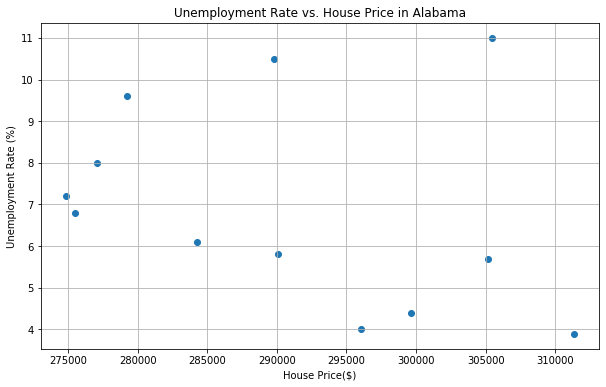

In [106]:

plt.figure(figsize=(10,6))
plt.scatter(states_house_price['Alabama']['house_price'],unemployment_data_by_state['Alabama']['unemployment_data'])
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. House Price in Alabama")
plt.grid()

Text(0.5, 1.0, 'Unemployment Rate vs. House Price in Nevada')

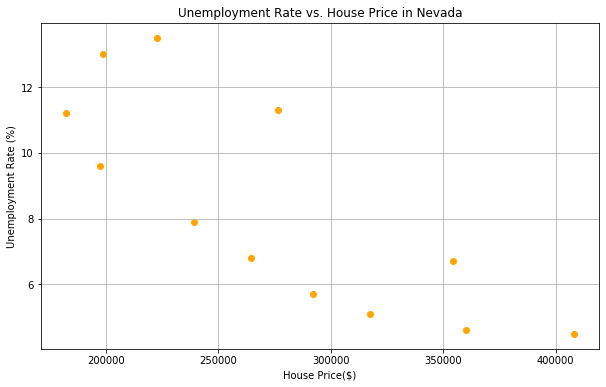

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price['Nevada']['house_price'],unemployment_data_by_state['Nevada']['unemployment_data'], c='orange')
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.title("Unemployment Rate vs. House Price in Nevada")

In [108]:
unemployment_data_by_state['Alabama']['unemployment_data']['Unemp Rate 2007']

State
AL    4.0
Name: Unemp Rate 2007, dtype: float64

In [109]:
states_house_price['Alabama']['house_price']['Median House Price 2008']

State
AL    305180
Name: Median House Price 2008, dtype: int64

In [110]:
def sep_unemp_population(size):
    pop=e_states.loc[e_states["CLF Pop"]== size]
    return pop[["Unemp Rate 2007","Unemp Rate 2008","Unemp Rate 2009","Unemp Rate 2010","Unemp Rate 2011","Unemp Rate 2012","Unemp Rate 2013","Unemp Rate 2014","Unemp Rate 2015","Unemp Rate 2016","Unemp Rate 2017","Unemp Rate 2018"]]


In [111]:
def med_house_price_size(size):
    pop=e_states.loc[e_states["CLF Pop"]== size]
    return pop[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [112]:
bins = [0,1000000,2000000,3000000,4000000,5000000,20000000]
group_names = ["<1,000,000","1,000,000-2,000,000","2,000,000-3,000,000","3,000,000-4,000,000","4,000,000-5,000,000","5,000,000+"]
e_states["CLF Pop"] = pd.cut(e_states["CLF 2018"], bins, labels=group_names)

unemp_by_size = {}
for x in group_names:
    unemp_by_size[x] = {
    'unemp_by_size': sep_unemp_population(x)
    }
e_states 

CLF 2007    Emp 2007  Unemp 2007  Unemp Rate 2007    CLF 2008  \
State                                                                    
AL      2175612.0   2089127.0     86485.0              4.0   2176489.0   
AK       350785.0    328579.0     22206.0              6.3    356109.0   
AZ      3034016.0   2917117.0    116899.0              3.9   3104863.0   
AR      1369284.0   1296572.0     72712.0              5.3   1375257.0   
CA     17893080.0  16931590.0    961490.0              5.4  18178123.0   
CO      2664677.0   2565218.0     99459.0              3.7   2716625.0   
CT      1856209.0   1773159.0     83050.0              4.5   1881454.0   
DE       443573.0    428312.0     15261.0              3.4    447041.0   
FL      9157124.0   8789770.0    367354.0              4.0   9215524.0   
GA      4815818.0   4597640.0    218178.0              4.5   4879253.0   
HI       638395.0    620535.0     17860.0              2.8    639691.0   
ID       754438.0    731235.0     23203.0              3.1    755153.0   
IL      6665601.0   6334010.0    331591.0              5.0   6657227.0   
IN      3207687.0   3061042.0    146645.0              4.6   3232097.0   
IA      1660677.0   1599332.0     61345.0              3.7   1679293.0   
KS      1483458.0   1420449.0     63009.0              4.2   1499676.0   
KY      2032082.0   1922220.0    109862.0              5.4   2030738.0   
LA      2030434.0   1944038.0     86396.0              4.3   2084835.0   
ME       700468.0    667781.0     32687.0              4.7    701646.0   
MD      2970094.0   2867348.0    102746.0              3.5   3001953.0   
MA      3426009.0   3268096.0    157913.0              4.6   3452468.0   
MI      5011120.0   4658939.0    352181.0              7.0   4921466.0   
MN      2906390.0   2773704.0    132686.0              4.6   2925088.0   
MS      1303514.0   1224059.0     79455.0              6.1   1306772.0   
MO      3034579.0   2879647.0    154932.0              5.1   3028857.0   
MT       502070.0    484189.0     17881.0              3.6    509163.0   
NE       978763.0    949494.0     29269.0              3.0    989757.0   
NV      1330396.0   1270572.0     59824.0              4.5   1363574.0   
NH       737942.0    712008.0     25934.0              3.5    742781.0   
NJ      4441797.0   4251815.0    189982.0              4.3   4504432.0   
NM       934027.0    898998.0     35029.0              3.8    944548.0   
NY      9522056.0   9088207.0    433849.0              4.6   9664773.0   
NC      4512856.0   4300304.0    212552.0              4.7   4560059.0   
ND       367234.0    355766.0     11468.0              3.1    371025.0   
OH      5990292.0   5657718.0    332574.0              5.6   5965166.0   
OK      1726259.0   1655490.0     70769.0              4.1   1746466.0   
OR      1921766.0   1822772.0     98994.0              5.2   1955121.0   
PA      6342997.0   6064063.0    278934.0              4.4   6451535.0   
RI       573173.0    543401.0     29772.0              5.2    570328.0   
SC      2125891.0   2005686.0    120205.0              5.7   2142232.0   
SD       442499.0    430011.0     12488.0              2.8    446618.0   
TN      3063669.0   2920352.0    143317.0              4.7   3054785.0   
TX     11431631.0  10941413.0    490218.0              4.3  11664390.0   
UT      1359129.0   1324060.0     35069.0              2.6   1371201.0   
VT       353739.0    339547.0     14192.0              4.0    354899.0   
VA      4036835.0   3914087.0    122748.0              3.0   4133443.0   
WA      3403163.0   3243308.0    159855.0              4.7   3478577.0   
WV       811160.0    773990.0     37170.0              4.6    812905.0   
WI      3087828.0   2936452.0    151376.0              4.9   3091796.0   
WY       286560.0    278486.0      8074.0              2.8    293279.0   

         Emp 2008  Unemp 2008  Unemp Rate 2008    CLF 2009    Emp 2009  ...  \
State                                                                   ...   
AL

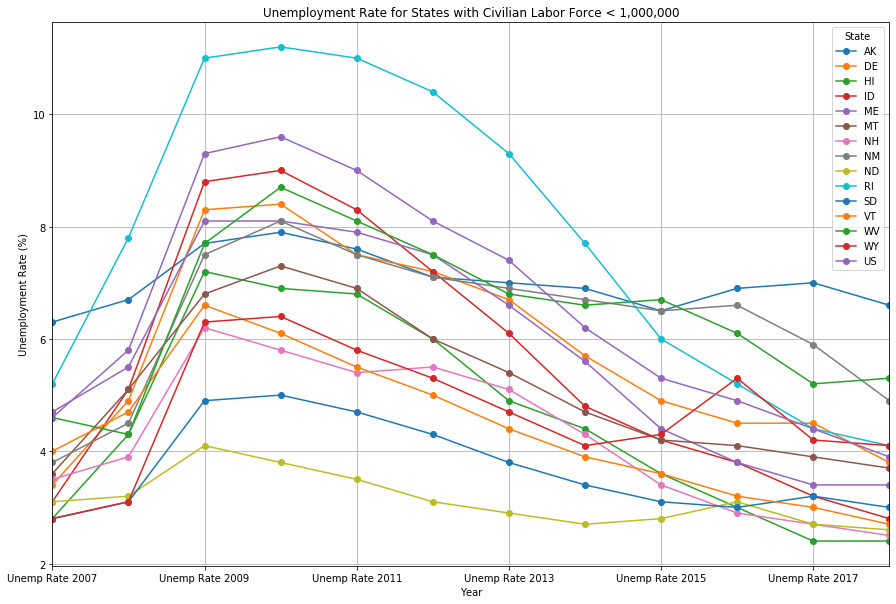

In [113]:
add_us =[unemp_by_size["<1,000,000"]['unemp_by_size'],us_unemployment]
results01 = pd.concat(add_us, axis=0)
results01.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force < 1,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

Slope: -0.21188811188811188


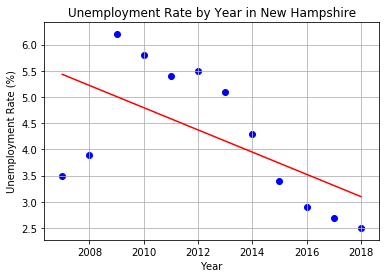

In [114]:
lineregress(years,unemployment_data_by_state['New Hampshire']['unemployment_data'])
plt.scatter(years,unemployment_data_by_state['New Hampshire']['unemployment_data'], c='blue')
plt.title("Unemployment Rate by Year in New Hampshire")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

Slope: -899.8601398601401


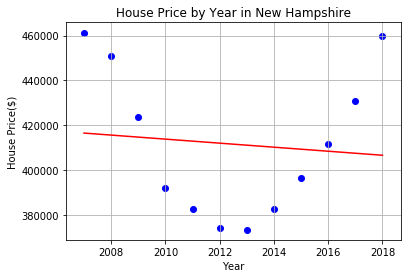

In [115]:
lineregress(years,states_house_price['New Hampshire']['house_price'])
plt.scatter(years,states_house_price['New Hampshire']['house_price'], c='blue')
plt.title("House Price by Year in New Hampshire")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()

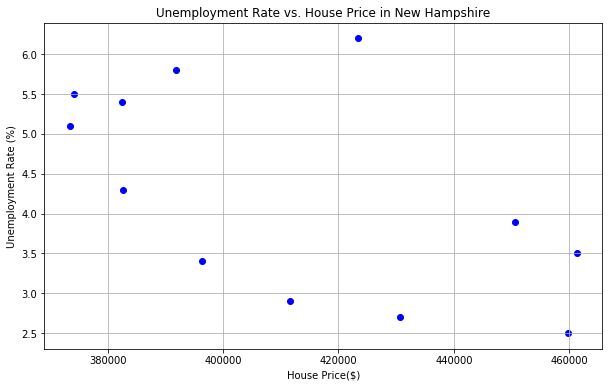

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price['New Hampshire']['house_price'],unemployment_data_by_state['New Hampshire']['unemployment_data'], c='blue')
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. House Price in New Hampshire")
plt.grid()

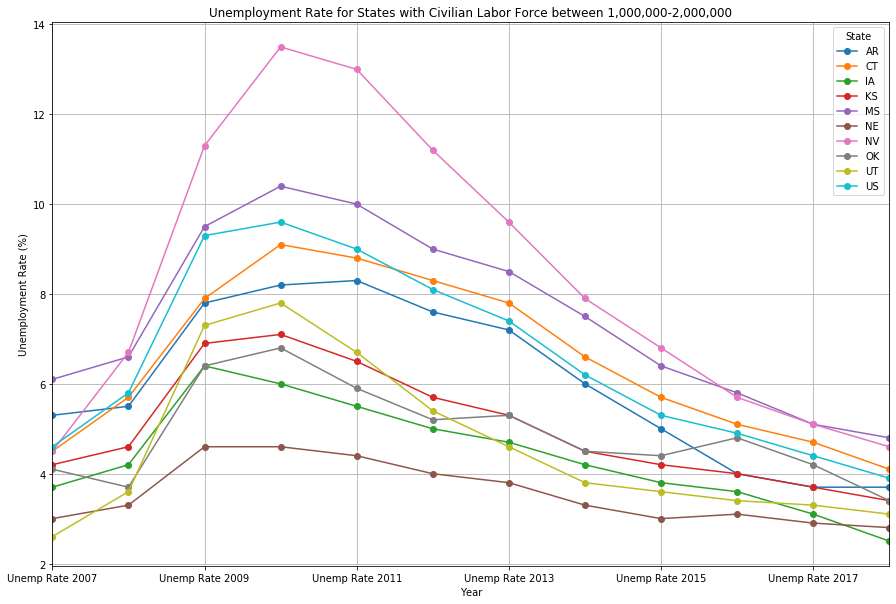

In [117]:
add_us1 =[unemp_by_size["1,000,000-2,000,000"]['unemp_by_size'],us_unemployment]
results02 = pd.concat(add_us1, axis=0)
results02.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force between 1,000,000-2,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

Slope: -1423.1118881118882


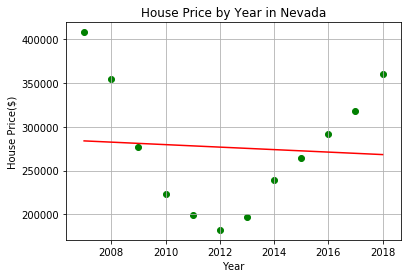

In [118]:
lineregress(years, states_house_price['Nevada']['house_price'])
plt.scatter(years,states_house_price['Nevada']['house_price'], c='green')
plt.title("House Price by Year in Nevada")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()

Slope: -0.35979020979020987


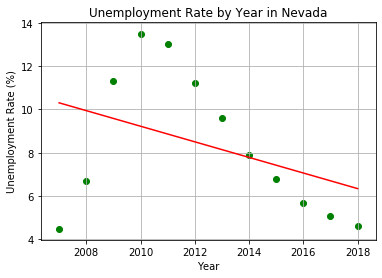

In [119]:
lineregress(years, unemployment_data_by_state['Nevada']['unemployment_data'])
plt.scatter(years,unemployment_data_by_state['Nevada']['unemployment_data'], c='green')
plt.title("Unemployment Rate by Year in Nevada")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

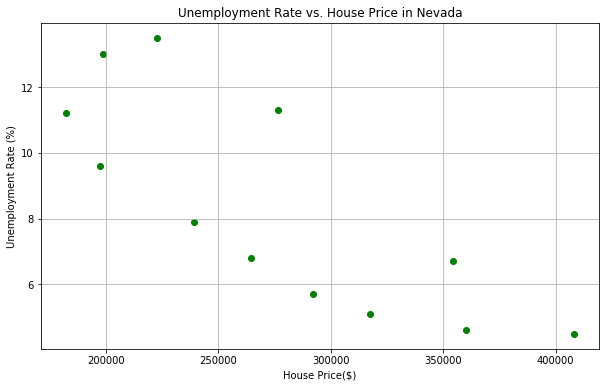

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price['Nevada']['house_price'],unemployment_data_by_state['Nevada']['unemployment_data'], c='green')
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. House Price in Nevada")
plt.grid()


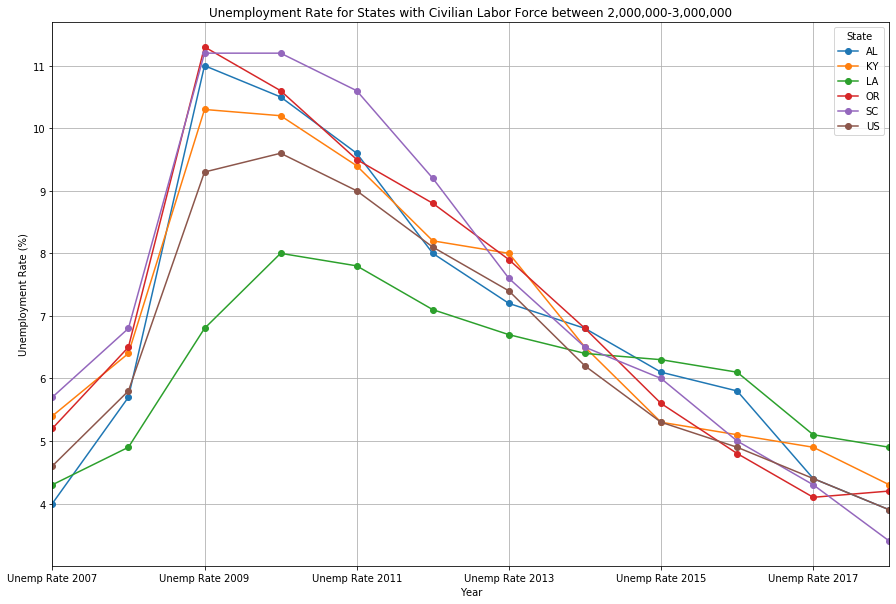

In [121]:
add_us2 =[unemp_by_size["2,000,000-3,000,000"]['unemp_by_size'],us_unemployment]
results03 = pd.concat(add_us2, axis=0)
results03.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force between 2,000,000-3,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

Slope: 1839.1258741258741


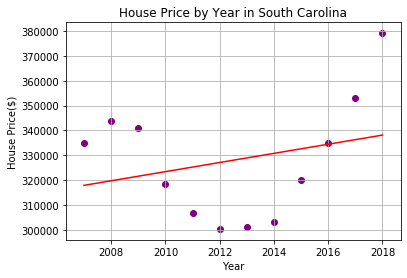

In [122]:
lineregress(years, states_house_price['South Carolina']['house_price'])
plt.scatter(years,states_house_price['South Carolina']['house_price'], c='purple')
plt.title("House Price by Year in South Carolina")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()

Slope: -0.45839160839160836


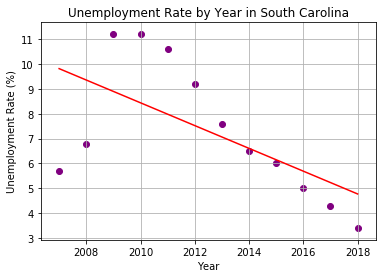

In [123]:
lineregress(years, unemployment_data_by_state['South Carolina']['unemployment_data'])
plt.scatter(years,unemployment_data_by_state['South Carolina']['unemployment_data'], c='purple')
plt.title("Unemployment Rate by Year in South Carolina")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()


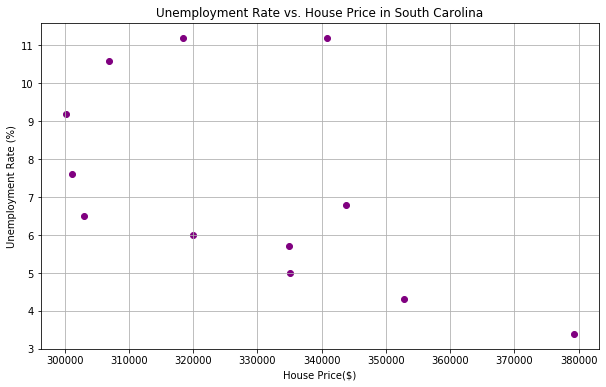

In [124]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price['South Carolina']['house_price'],unemployment_data_by_state['South Carolina']['unemployment_data'], c='purple')
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. House Price in South Carolina")
plt.grid()

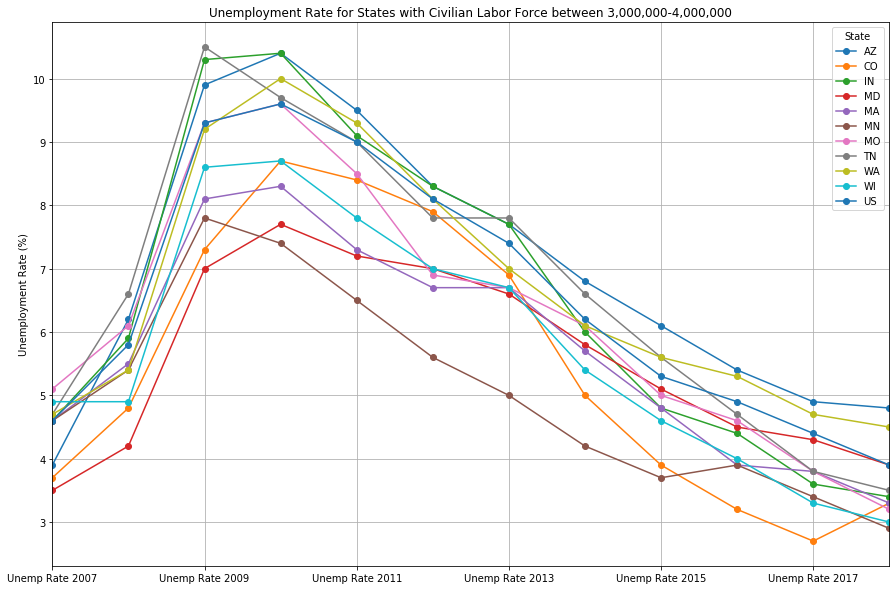

In [174]:
add_us3 =[unemp_by_size["3,000,000-4,000,000"]['unemp_by_size'],us_unemployment]
results04 = pd.concat(add_us3, axis=0)
results04.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force between 3,000,000-4,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

Slope: 4633.216783216783


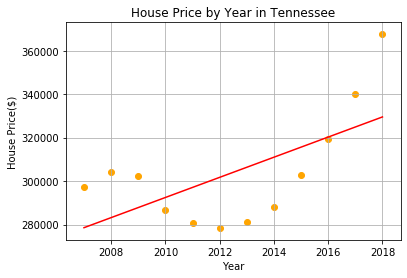

In [126]:
lineregress(years, states_house_price['Tennessee']['house_price'])
plt.scatter(years,states_house_price['Tennessee']['house_price'], c='orange')
plt.title("House Price by Year in Tennessee")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()

Slope: -0.37307692307692303


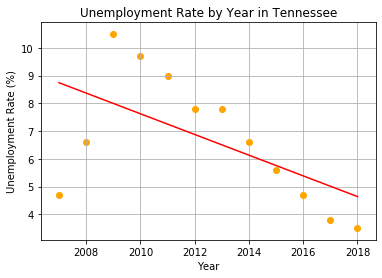

In [127]:
lineregress(years, unemployment_data_by_state['Tennessee']['unemployment_data'])
plt.scatter(years,unemployment_data_by_state['Tennessee']['unemployment_data'], c='orange')
plt.title("Unemployment Rate by Year in Tennessee")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

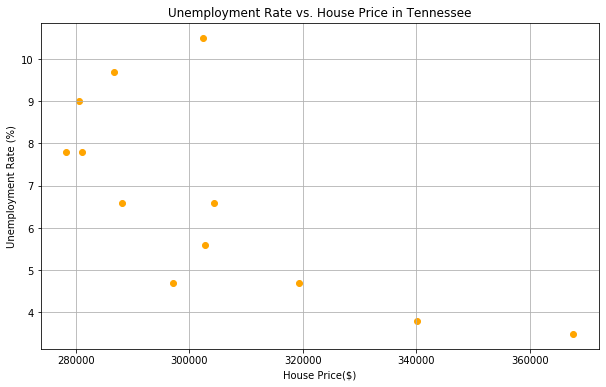

In [128]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price['Tennessee']['house_price'],unemployment_data_by_state['Tennessee']['unemployment_data'], c='orange')
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. House Price in Tennessee")
plt.grid()

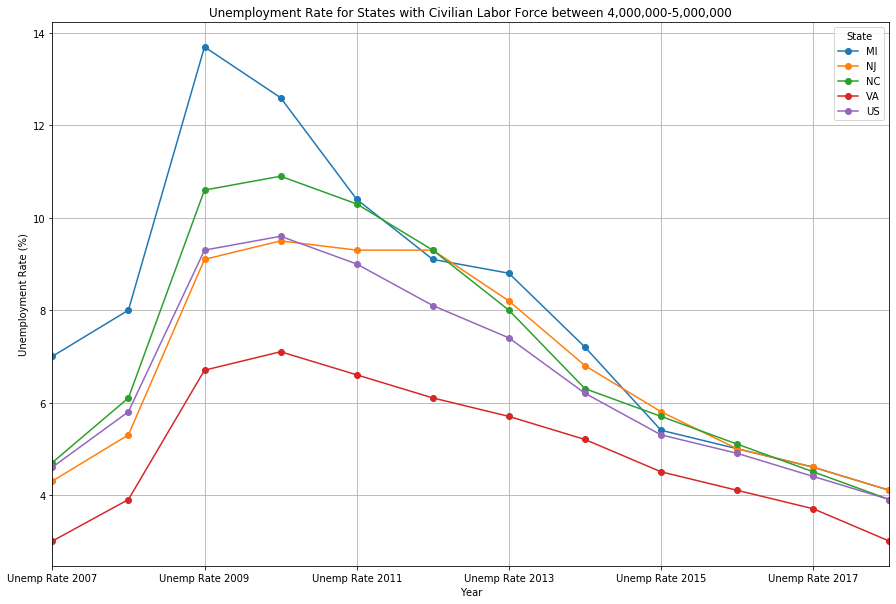

In [129]:
add_us4 =[unemp_by_size["4,000,000-5,000,000"]['unemp_by_size'],us_unemployment]
results05 = pd.concat(add_us4, axis=0)
results05.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force between 4,000,000-5,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

Slope: -0.591958041958042


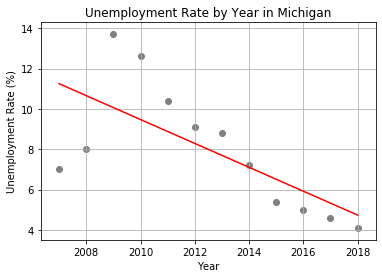

In [130]:
lineregress(years, unemployment_data_by_state['Michigan']['unemployment_data'])
plt.scatter(years,unemployment_data_by_state['Michigan']['unemployment_data'], c='grey')
plt.title("Unemployment Rate by Year in Michigan")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

Slope: 2011.2587412587413


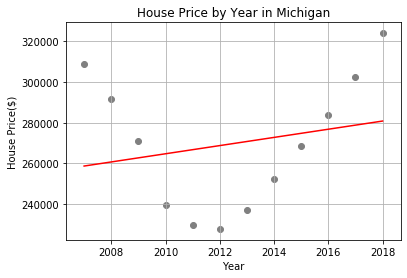

In [131]:
lineregress(years,states_house_price['Michigan']['house_price'])
plt.scatter(years,states_house_price['Michigan']['house_price'], c='grey')
plt.title("House Price by Year in Michigan")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()

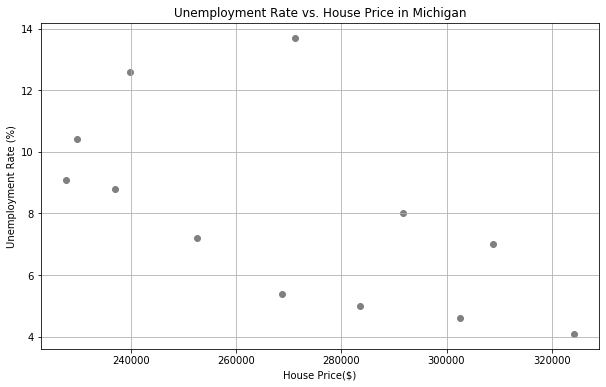

In [132]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price['Michigan']['house_price'],unemployment_data_by_state['Michigan']['unemployment_data'], c='grey')
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. House Price in Michigan")
plt.grid()

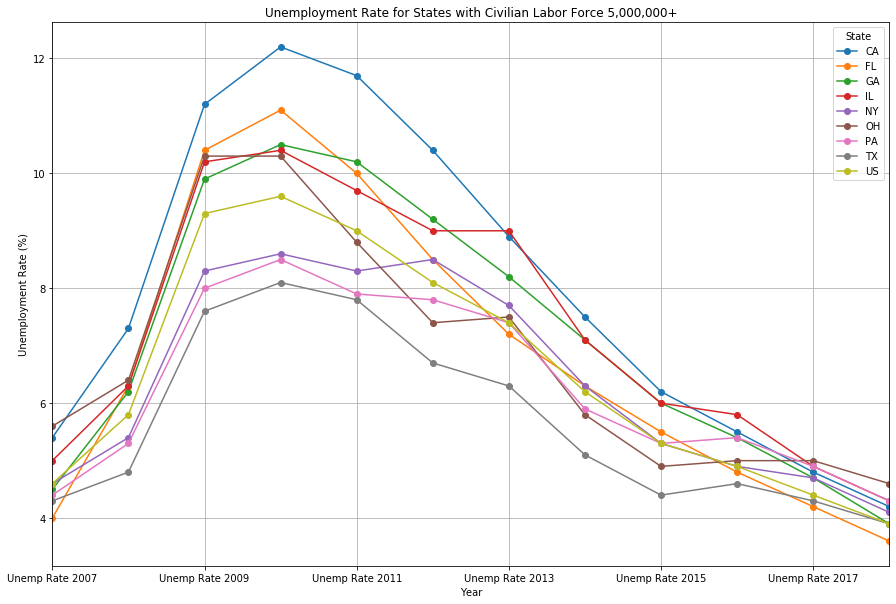

In [133]:
add_us5 =[unemp_by_size["5,000,000+"]['unemp_by_size'],us_unemployment]
results06 = pd.concat(add_us5, axis=0)
results06.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force 5,000,000+")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel('Year')
plt.grid()


Slope: -0.41853146853146855


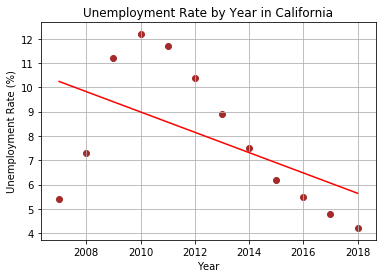

In [134]:
lineregress(years,unemployment_data_by_state['California']['unemployment_data'])
plt.scatter(years,unemployment_data_by_state['California']['unemployment_data'], c='brown')
plt.title("Unemployment Rate by Year in California")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

Slope: 6847.342657342658


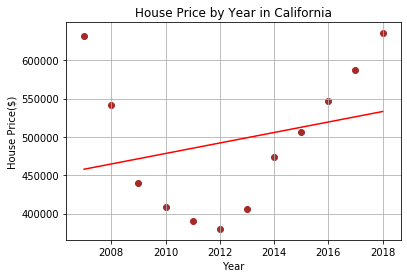

In [135]:
lineregress(years, states_house_price['California']['house_price'])
plt.scatter(years,states_house_price['California']['house_price'], c='brown')
plt.title("House Price by Year in California")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()

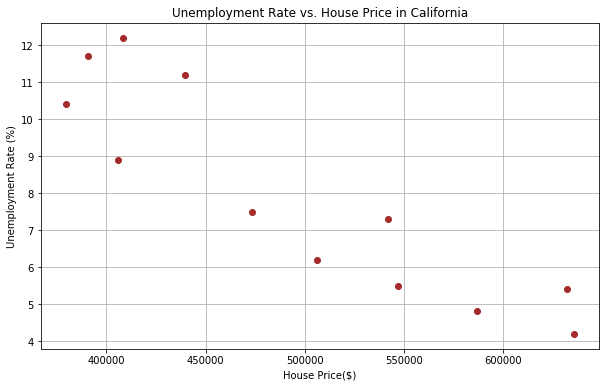

In [136]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price['California']['house_price'],unemployment_data_by_state['California']['unemployment_data'], c='brown')
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. House Price in California")
plt.grid()

In [137]:

house_price_by_size_of_state = {}
for y in group_names:
    house_price_by_size_of_state[y] = {
        'house_price_by_size': med_house_price_size(y)
    }

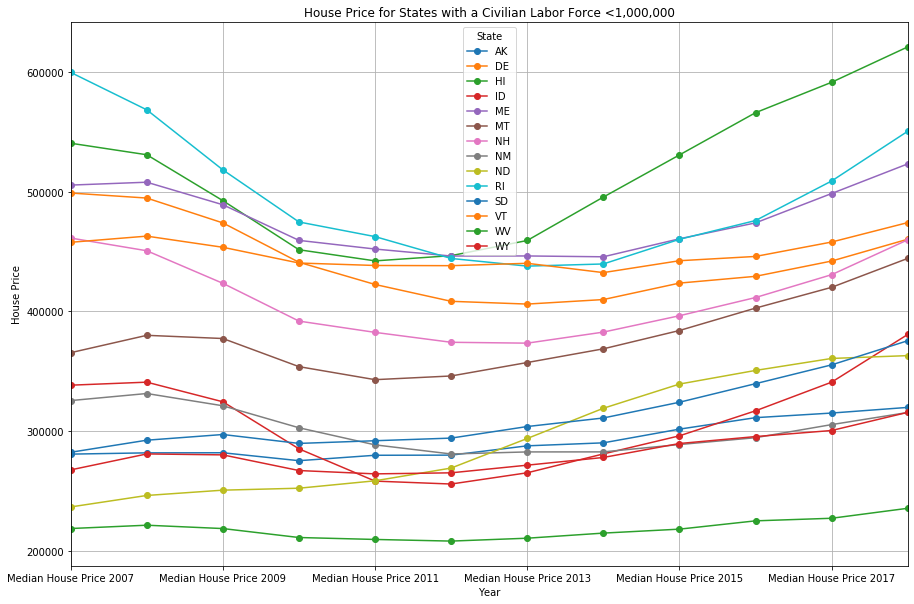

In [138]:
house_price_by_size_of_state["<1,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with a Civilian Labor Force <1,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

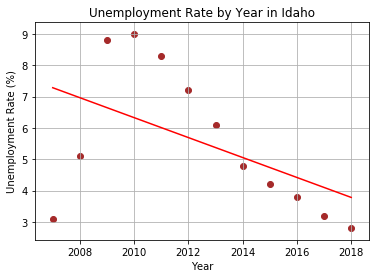

In [171]:
lineregress(years,unemployment_data_by_state['Idaho']['unemployment_data'])
plt.scatter(years,unemployment_data_by_state['Idaho']['unemployment_data'], c='brown')
plt.title("Unemployment Rate by Year in Idaho")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

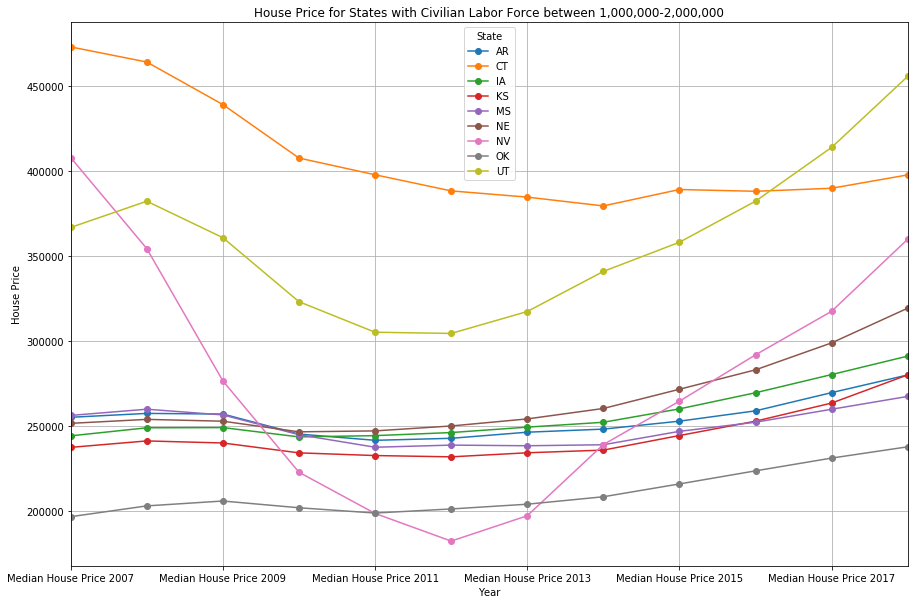

In [140]:
house_price_by_size_of_state["1,000,000-2,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force between 1,000,000-2,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

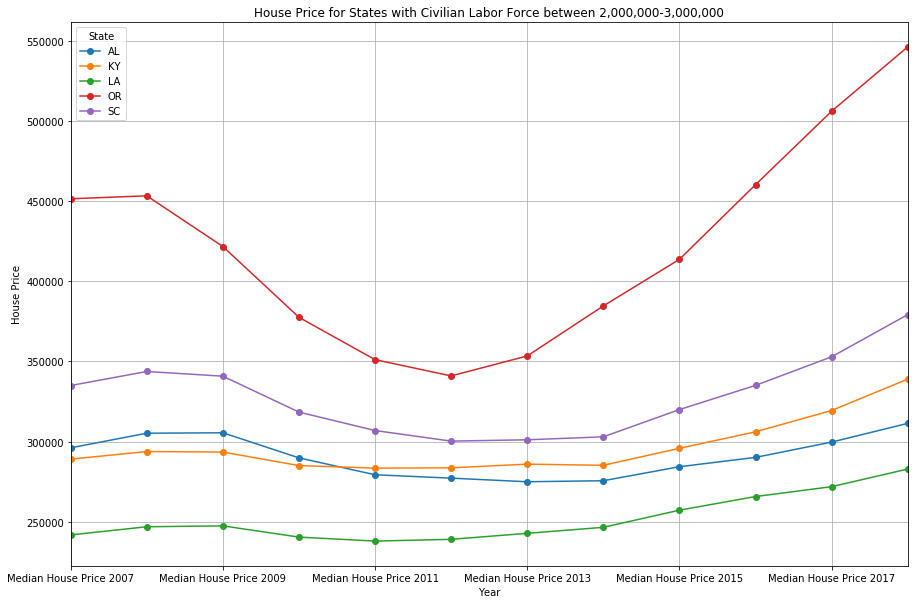

In [141]:
house_price_by_size_of_state["2,000,000-3,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force between 2,000,000-3,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

Slope: 7281.258741258741


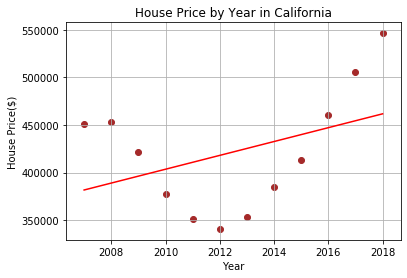

In [142]:
lineregress(years, states_house_price['Oregon']['house_price'])
plt.scatter(years,states_house_price['Oregon']['house_price'], c='brown')
plt.title("House Price by Year in California")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()

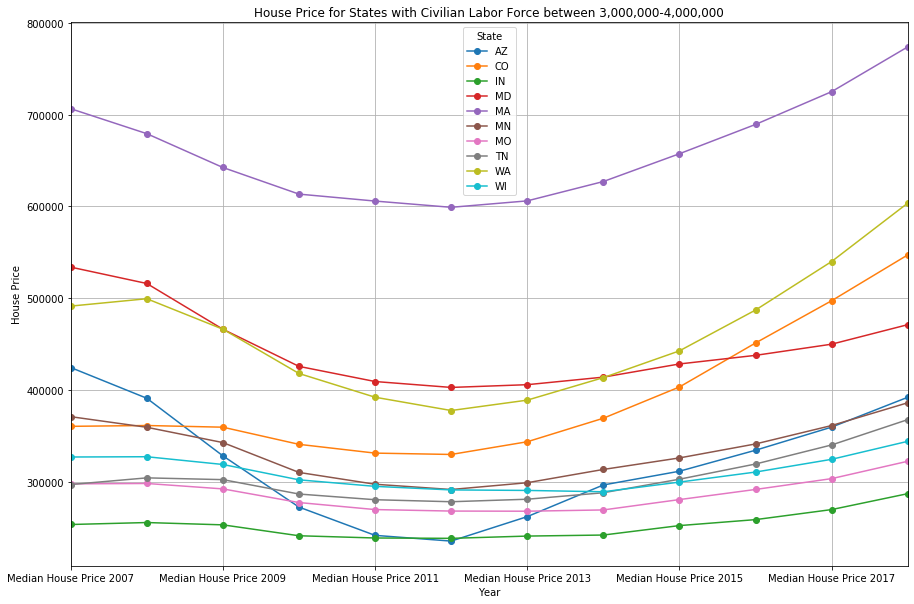

In [143]:
house_price_by_size_of_state["3,000,000-4,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force between 3,000,000-4,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

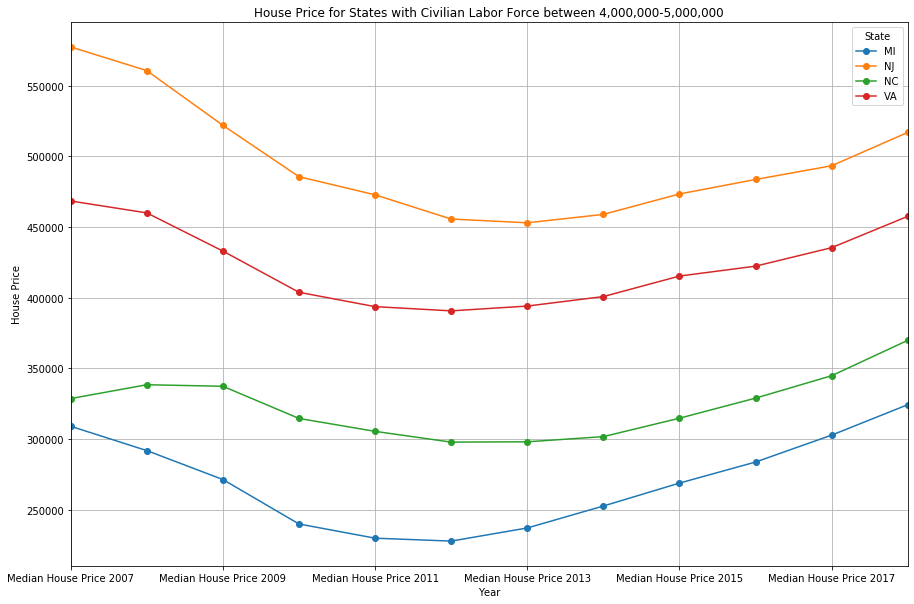

In [144]:
house_price_by_size_of_state["4,000,000-5,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force between 4,000,000-5,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

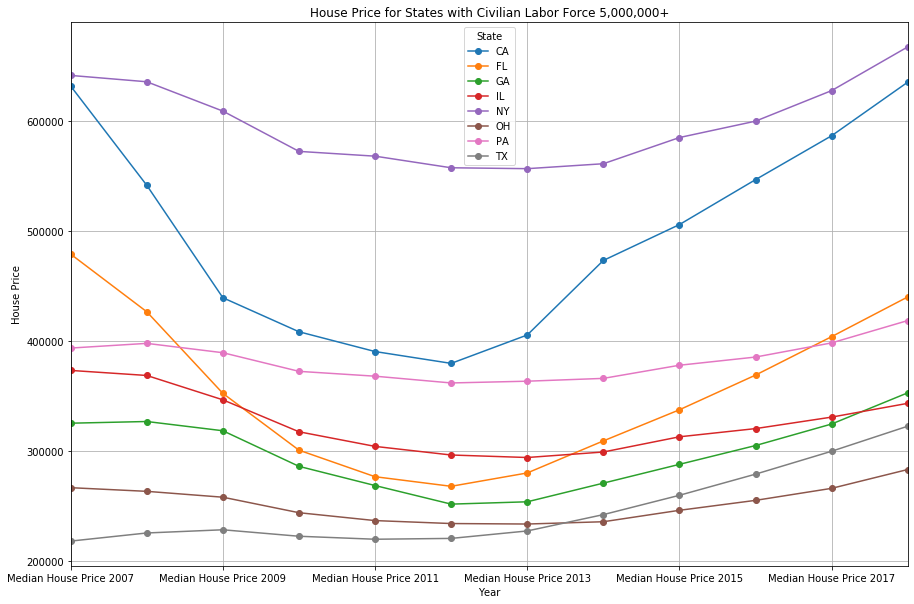

In [145]:
house_price_by_size_of_state["5,000,000+"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force 5,000,000+")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

In [146]:
bins1 = [100000,250000,300000,400000,500000,800000]
group_names1 = ["100,000-250,000","250,000-300,000","300,000-400,000","400,000-500,000","500,000+"]
e_states["Starting House Price"] = pd.cut(e_states["Median House Price 2007"], bins1, labels=group_names1)


In [147]:
def start_house_price_group(price):
    pop=e_states.loc[e_states["Starting House Price"]== price]
    return pop[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [148]:
grouped_house_price = {}
for i in group_names1:
    grouped_house_price[i] = {
        'gr_house_price': start_house_price_group(i)
    }

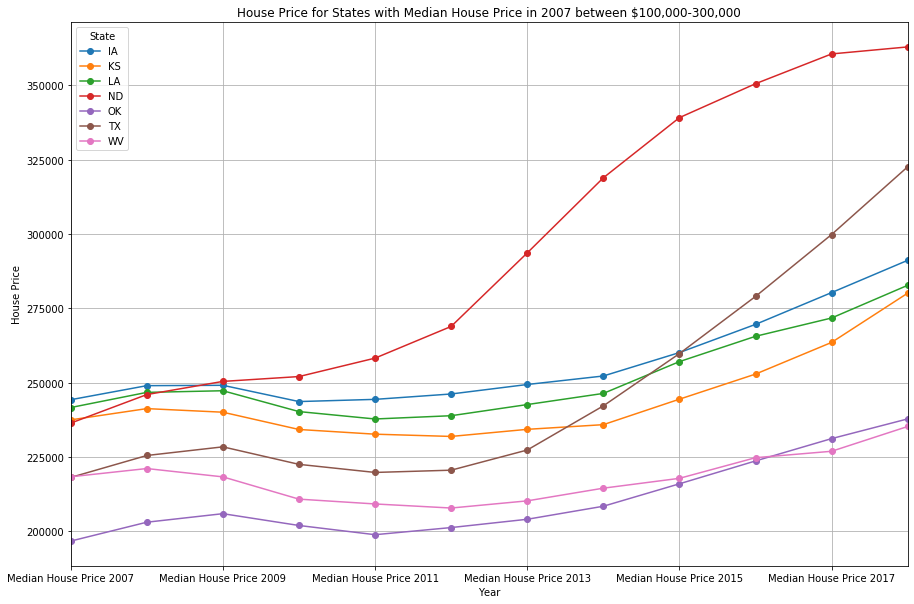

In [149]:
grouped_house_price["100,000-250,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $100,000-300,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

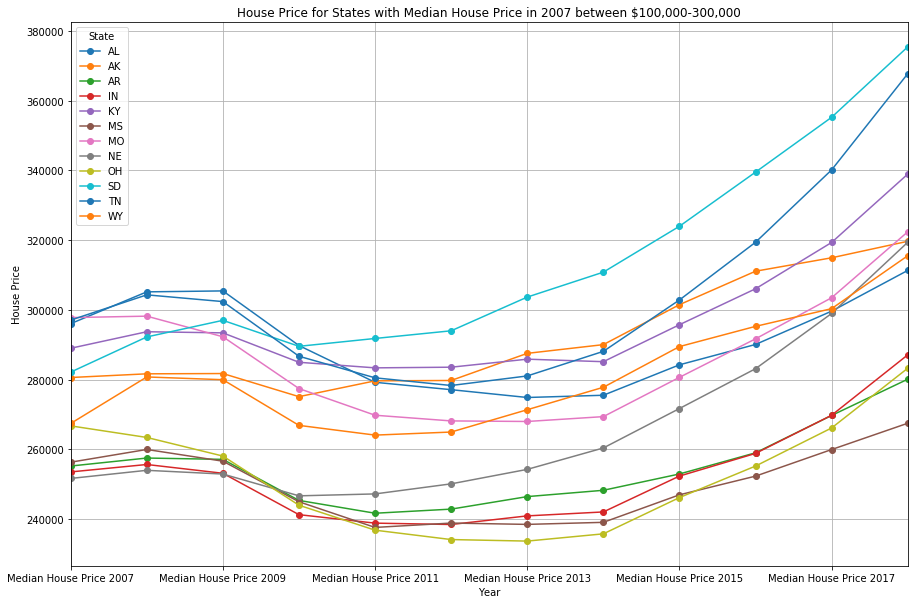

In [150]:
grouped_house_price["250,000-300,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $100,000-300,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

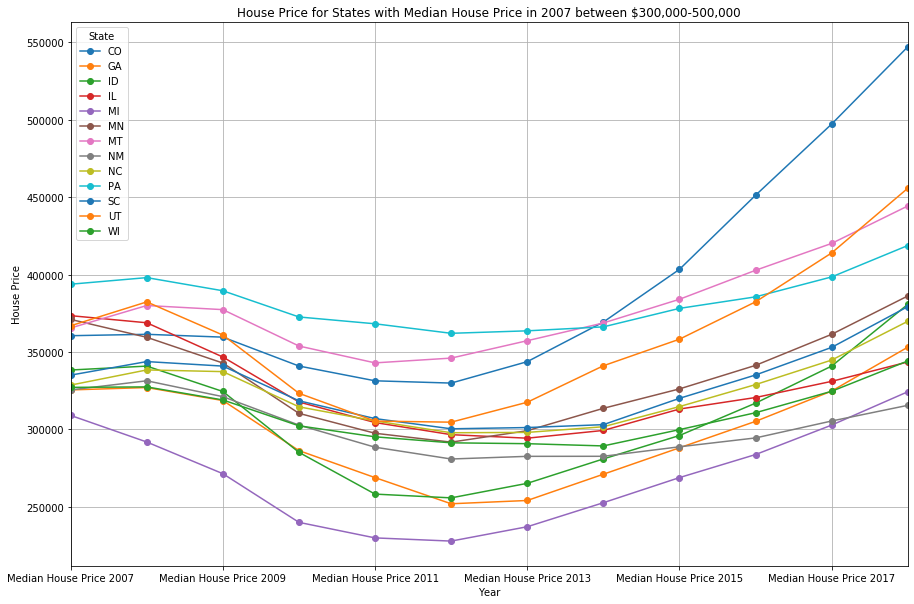

In [151]:
grouped_house_price["300,000-400,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $300,000-500,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

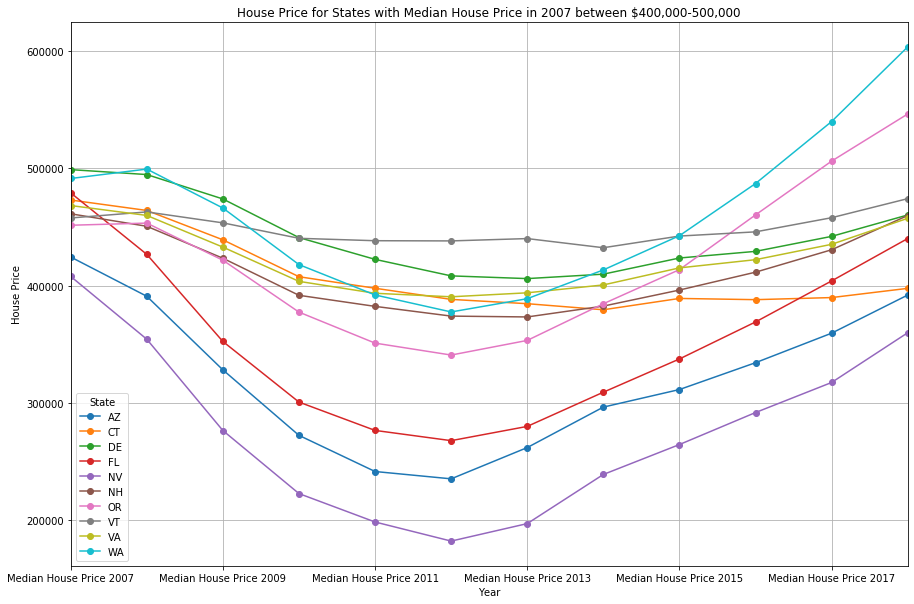

In [152]:
grouped_house_price["400,000-500,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $400,000-500,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

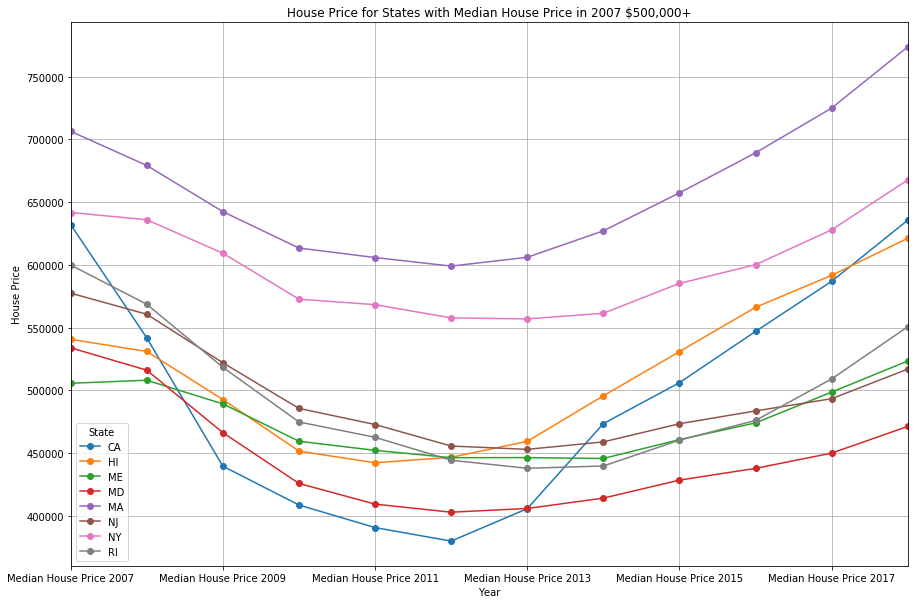

In [153]:
grouped_house_price["500,000+"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 $500,000+")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

In [154]:
def unemployment_by_start_house_price(price):
    pop = e_states.loc[e_states["Starting House Price"]== price]
    return pop[["Unemp Rate 2007","Unemp Rate 2008","Unemp Rate 2009","Unemp Rate 2010","Unemp Rate 2011","Unemp Rate 2012","Unemp Rate 2013","Unemp Rate 2014","Unemp Rate 2015","Unemp Rate 2016","Unemp Rate 2017","Unemp Rate 2018"]]


In [155]:
unemp_by_house_price = {}
for a in group_names1:
    unemp_by_house_price[a] = {
        'unemp_by_price': unemployment_by_start_house_price(a)
    }

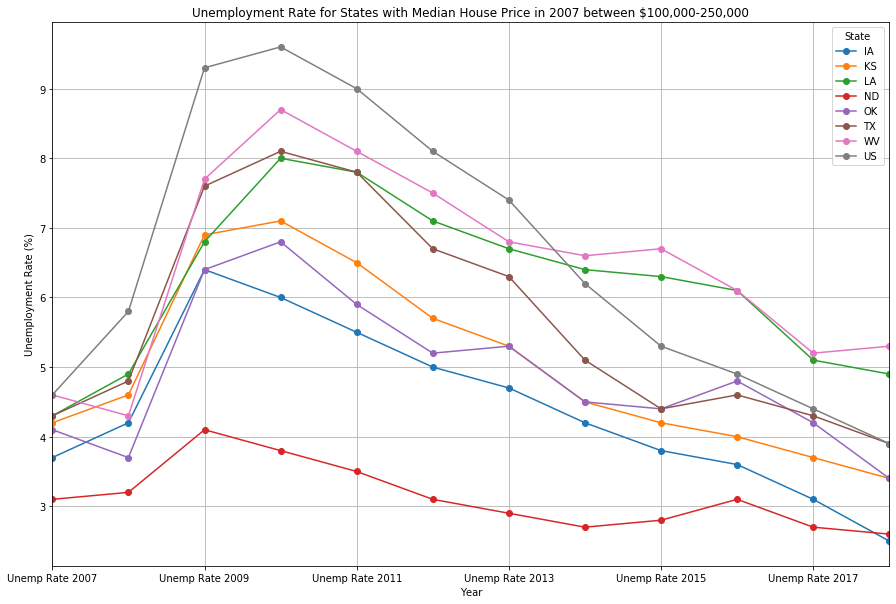

In [156]:
frame3 = [unemp_by_house_price['100,000-250,000']['unemp_by_price'],us_unemployment]
results4 = pd.concat(frame3, axis=0)
results4.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 between $100,000-250,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

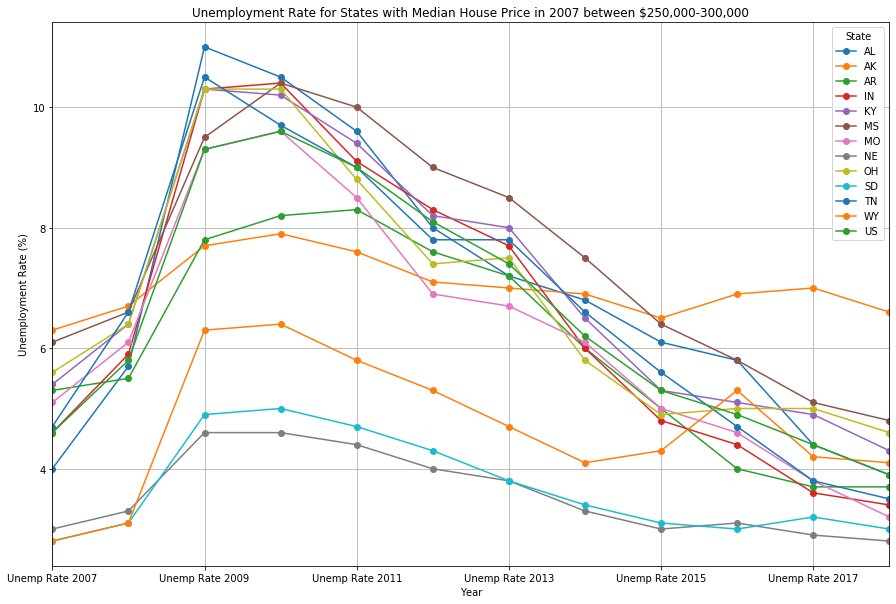

In [157]:
frame3 = [unemp_by_house_price['250,000-300,000']['unemp_by_price'],us_unemployment]
results4 = pd.concat(frame3, axis=0)
results4.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 between $250,000-300,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

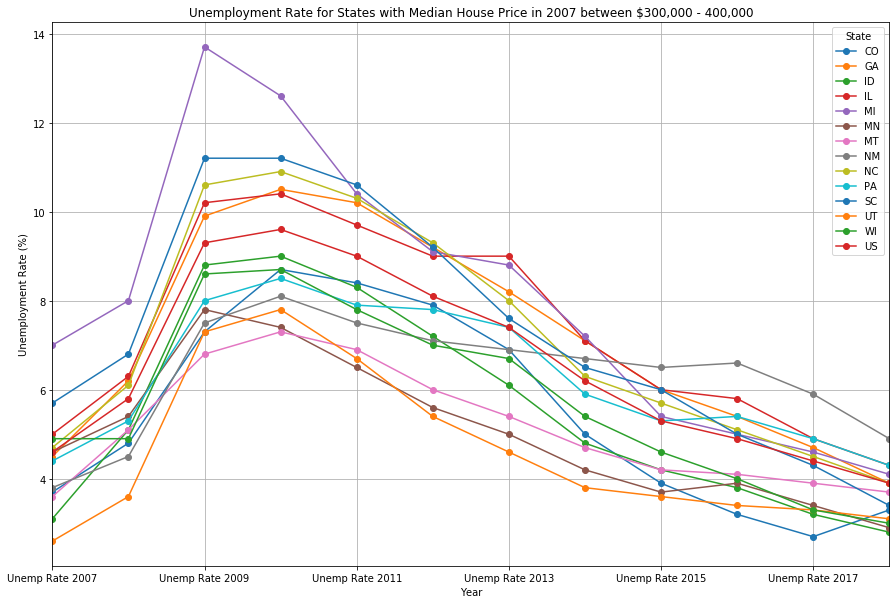

In [158]:
frame2 = [unemp_by_house_price['300,000-400,000']['unemp_by_price'],us_unemployment]
results3 = pd.concat(frame2, axis=0)
results3.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 between $300,000 - 400,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

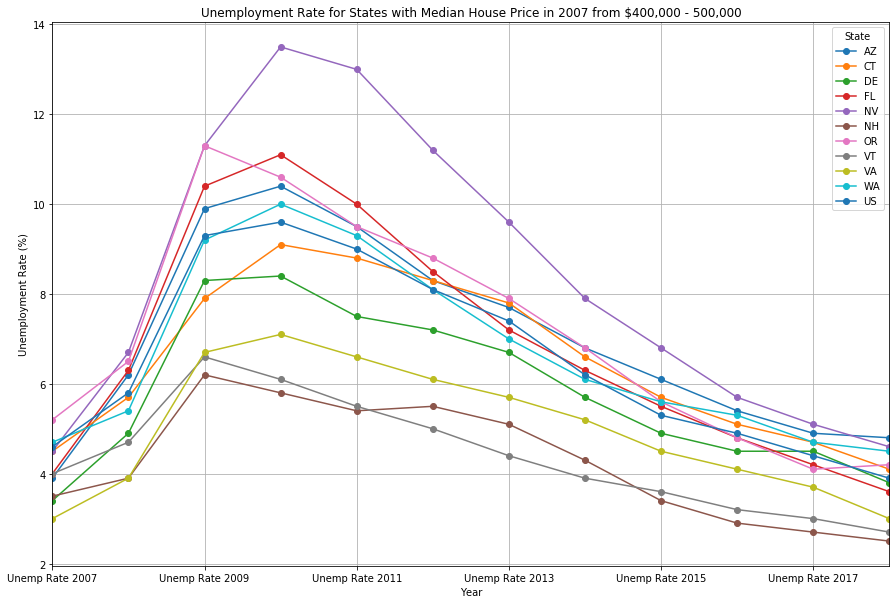

In [159]:
frame1 = [unemp_by_house_price['400,000-500,000']['unemp_by_price'],us_unemployment]
results2 = pd.concat(frame1, axis=0)
results2.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 from $400,000 - 500,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

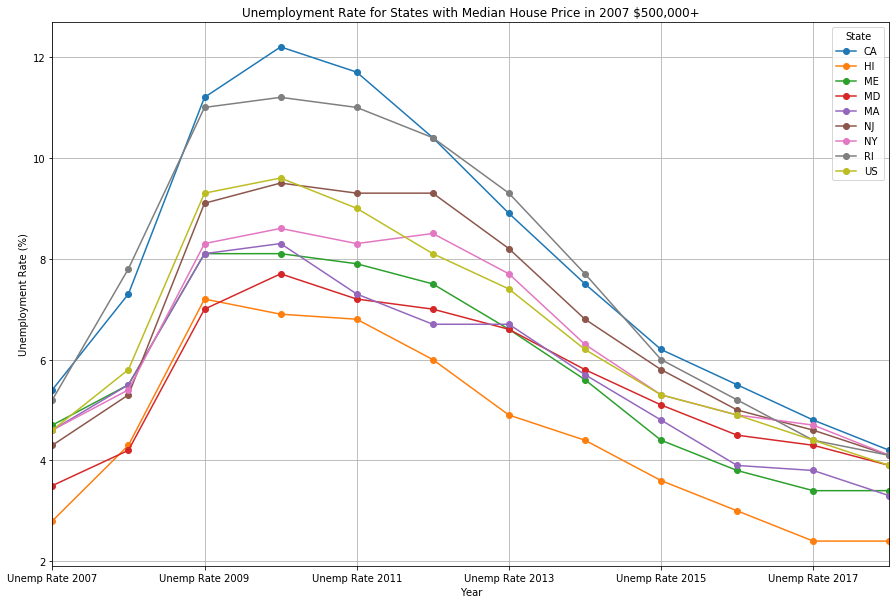

In [160]:
frame = [unemp_by_house_price['500,000+']['unemp_by_price'],us_unemployment]
results1 = pd.concat(frame, axis=0)
results1.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 $500,000+")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

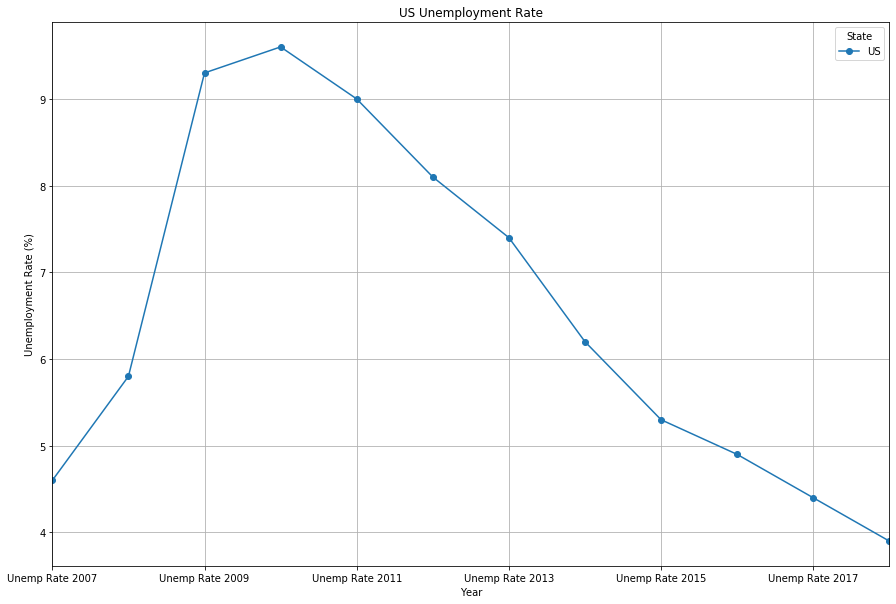

In [161]:
us_unemployment.T.plot.line(figsize=(15,10),marker='o')
plt.title("US Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

/Users/jackharvey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


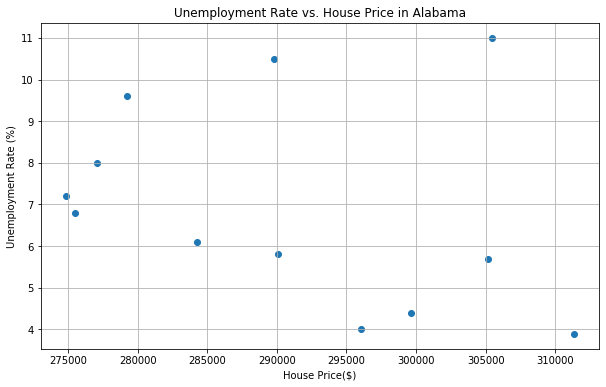

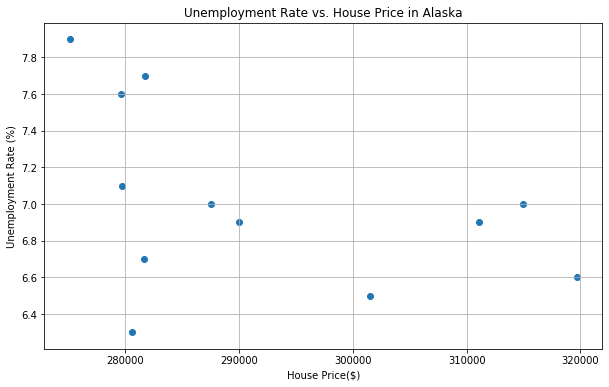

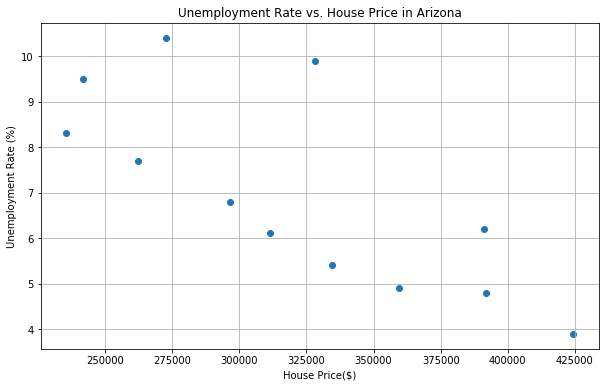

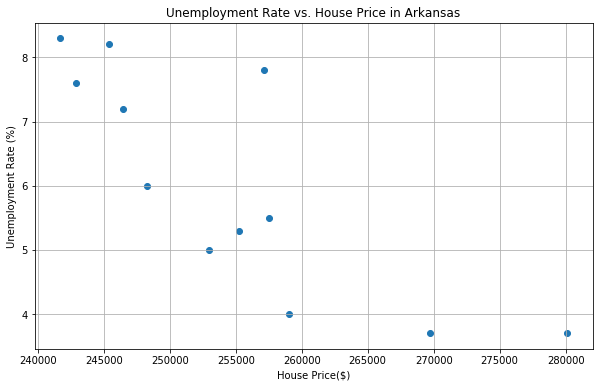

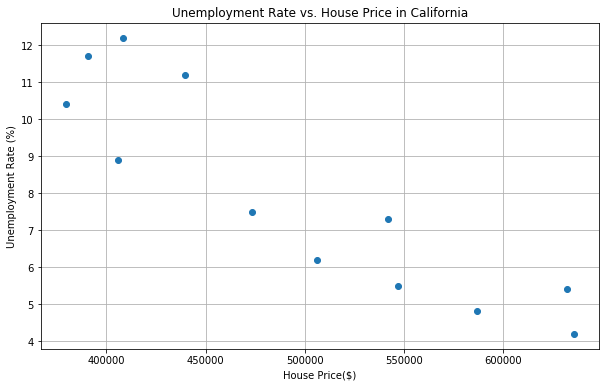

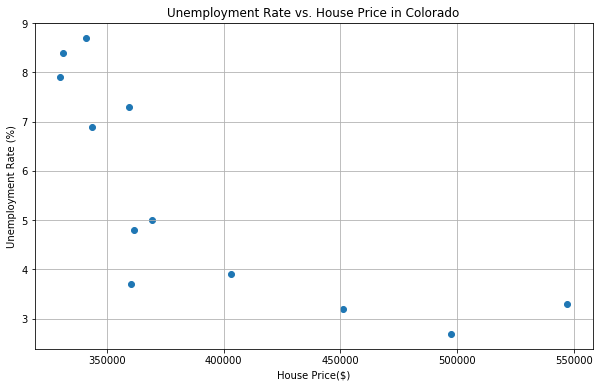

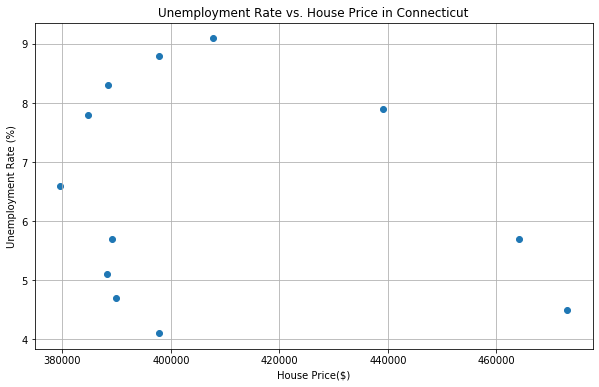

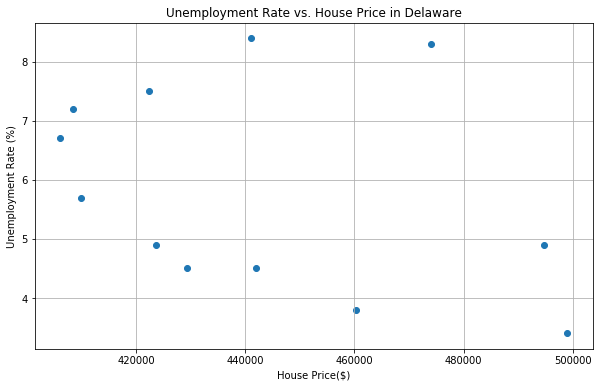

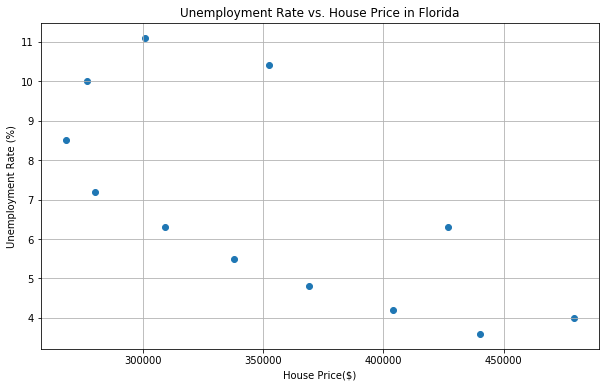

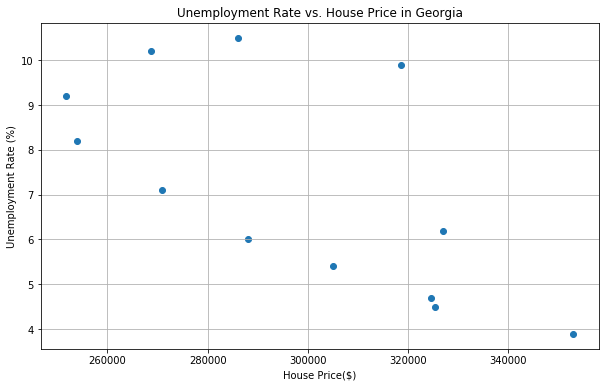

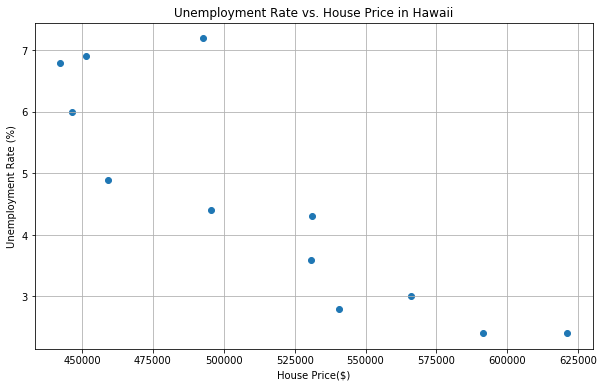

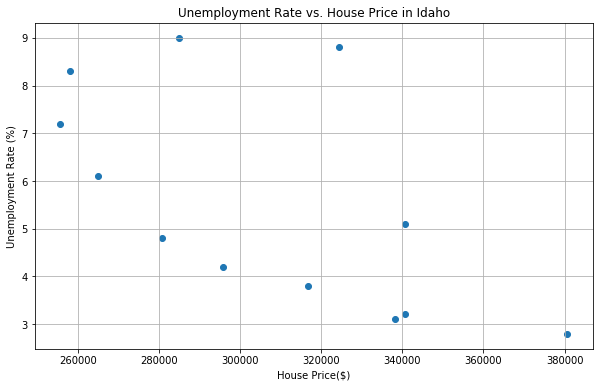

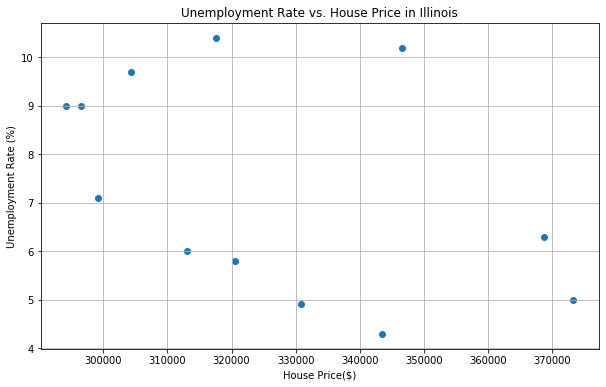

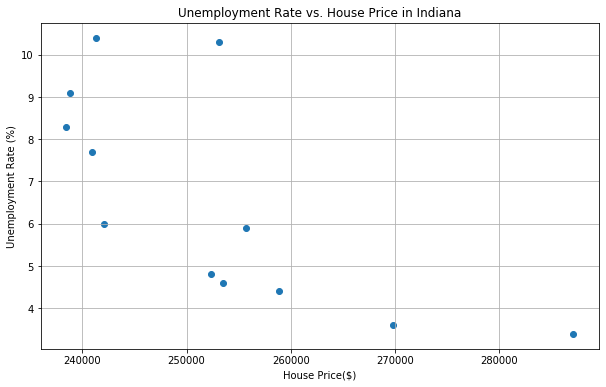

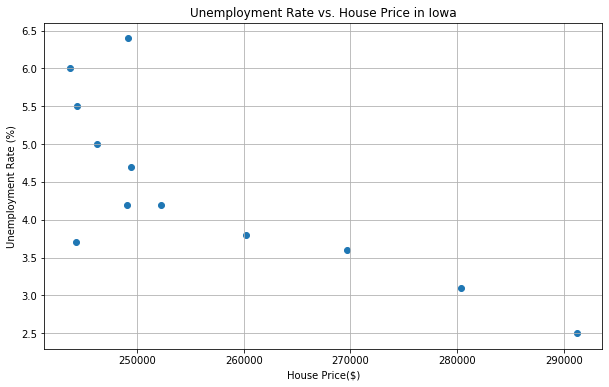

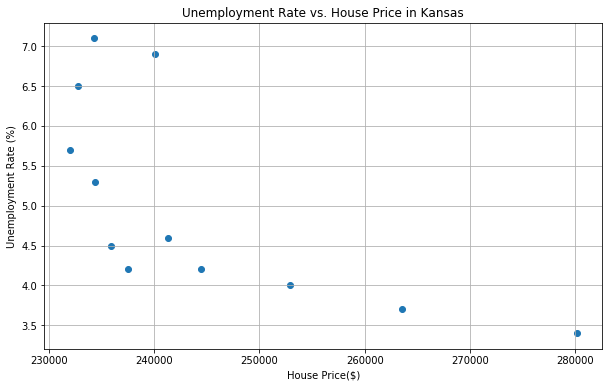

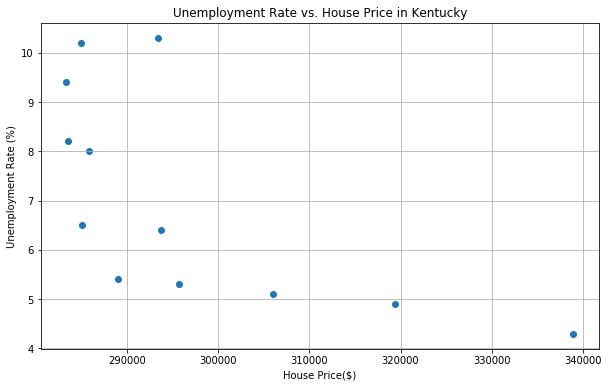

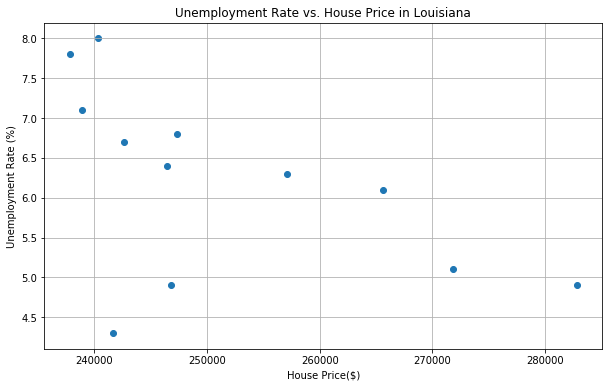

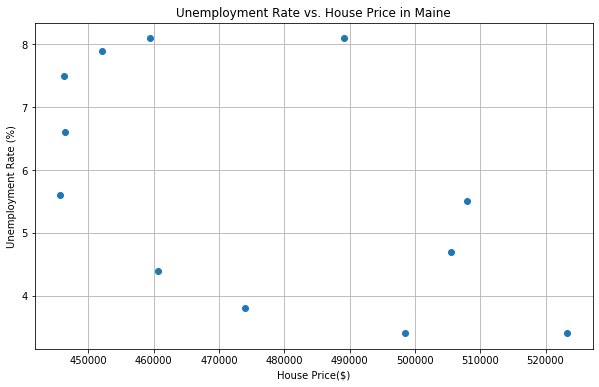

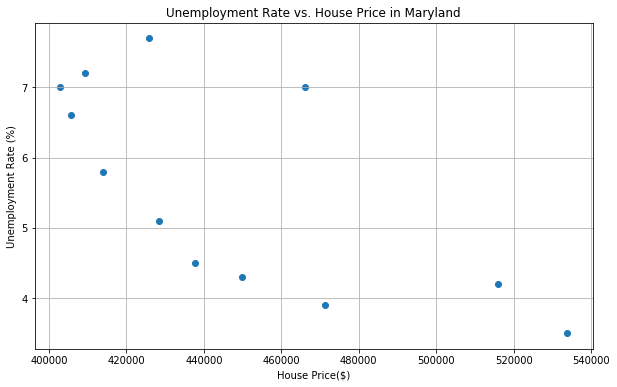

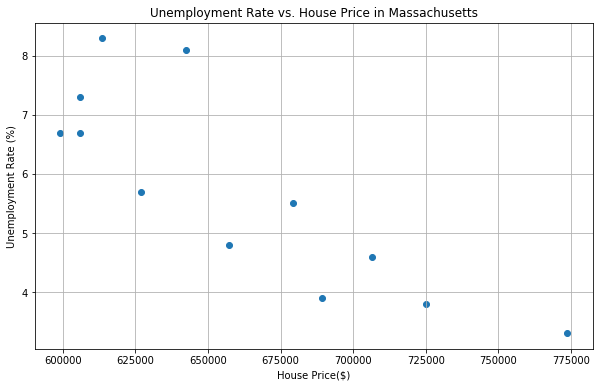

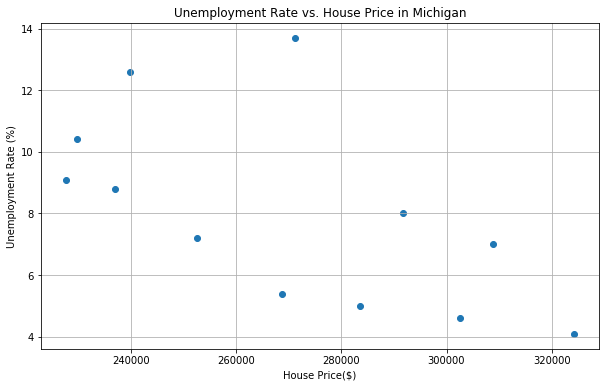

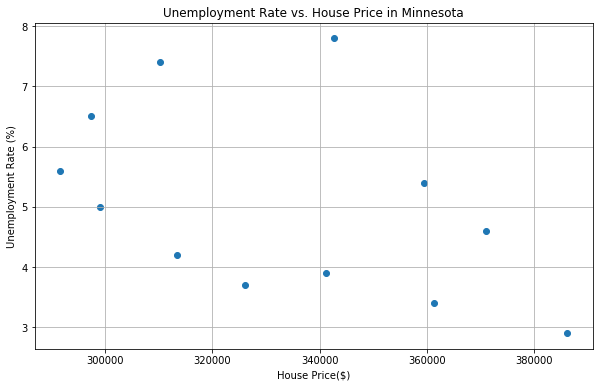

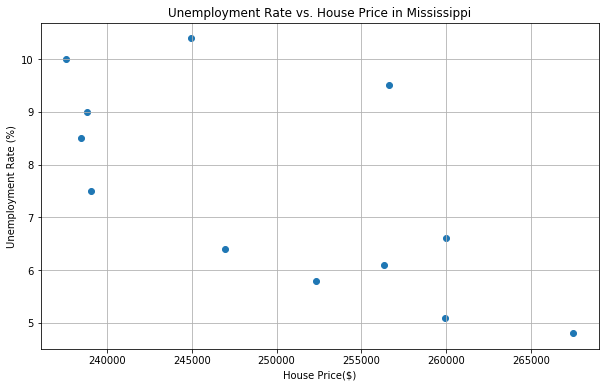

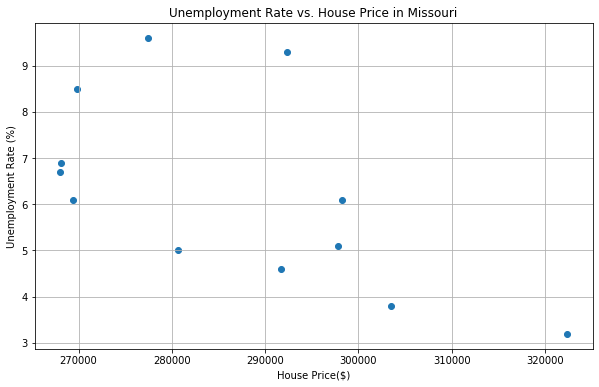

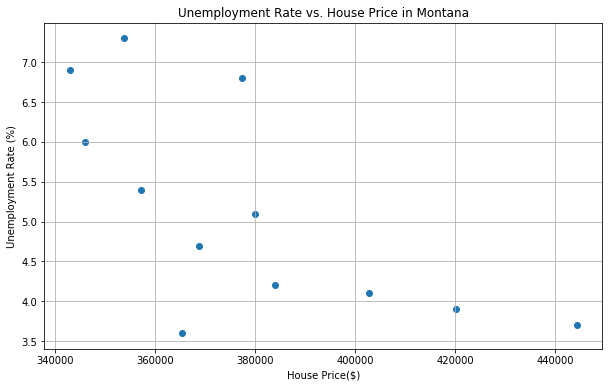

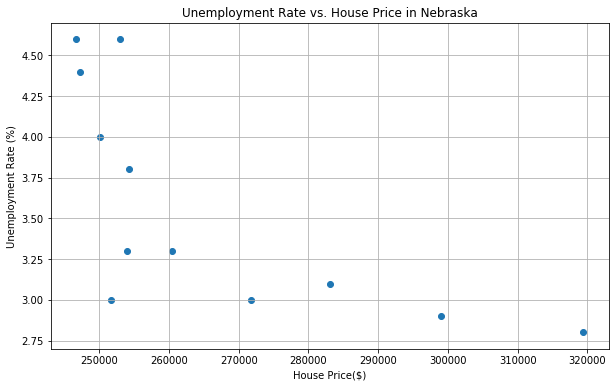

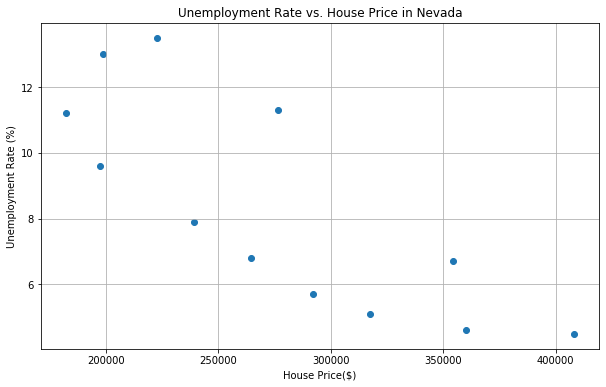

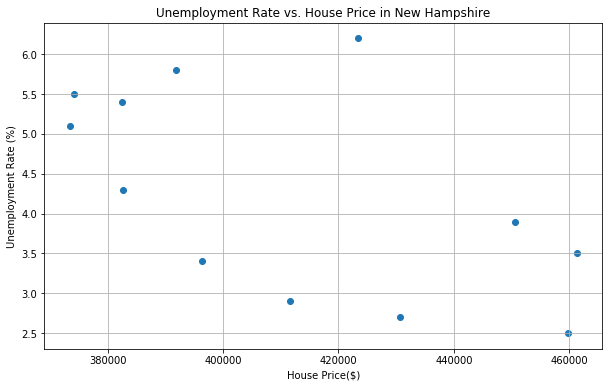

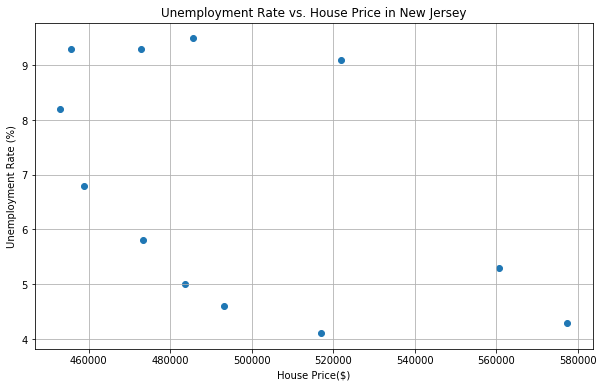

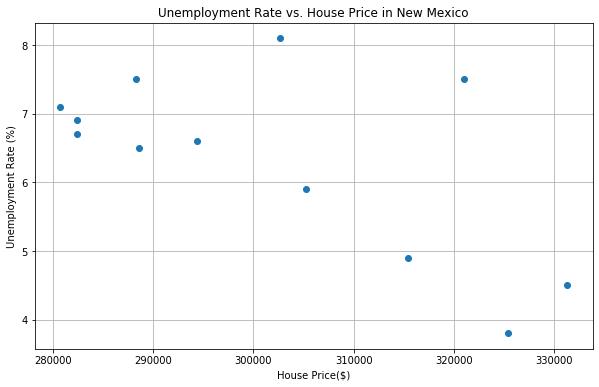

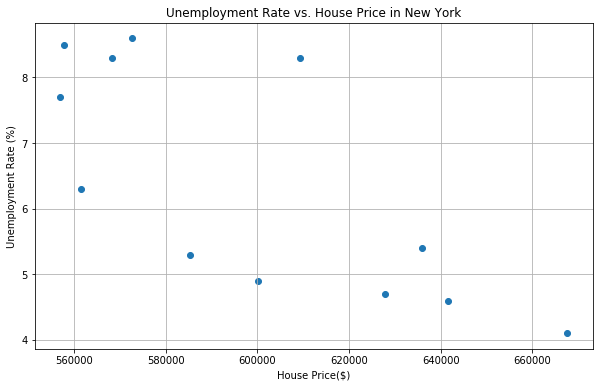

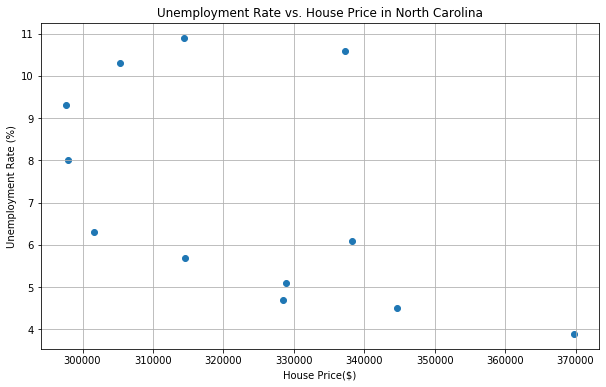

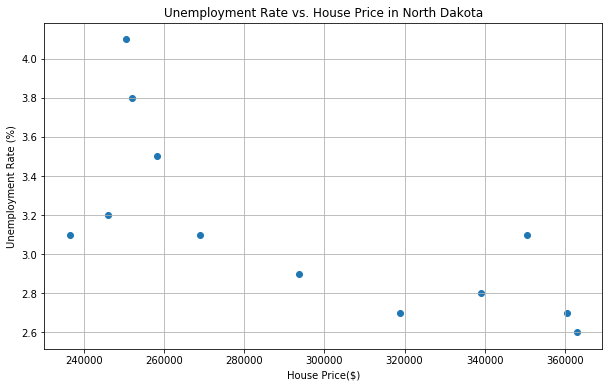

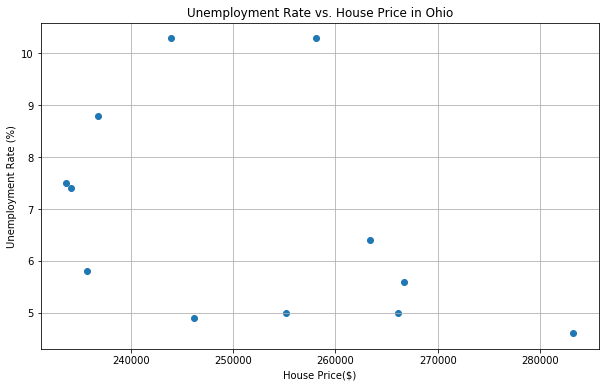

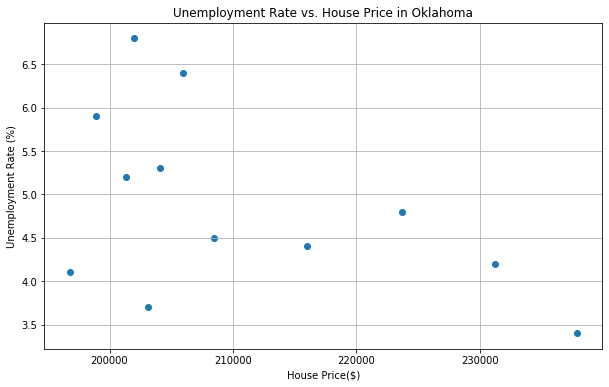

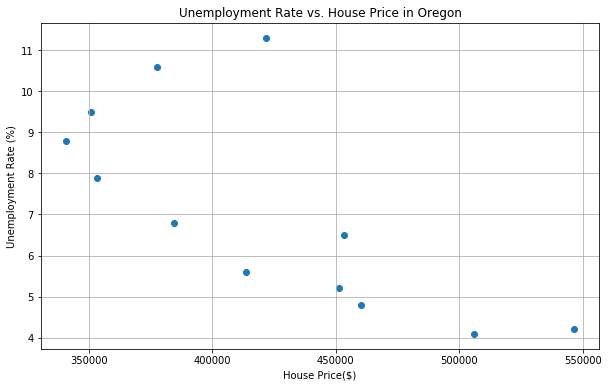

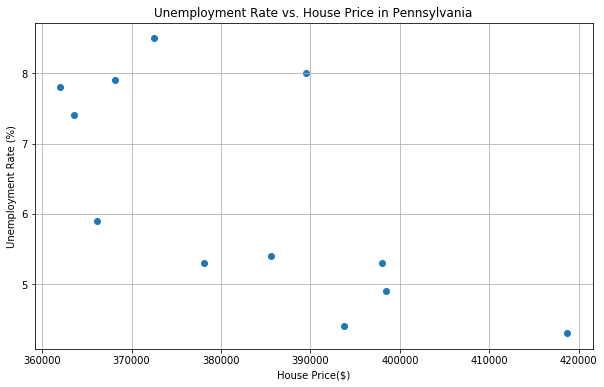

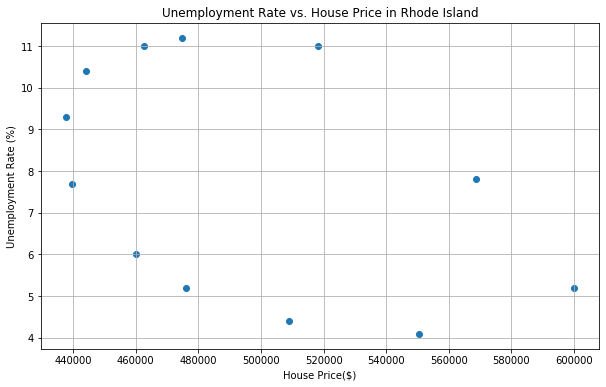

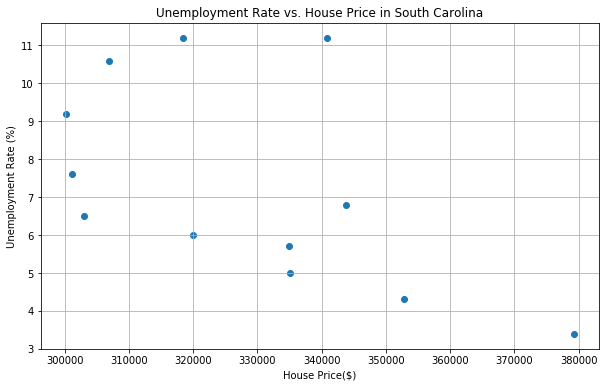

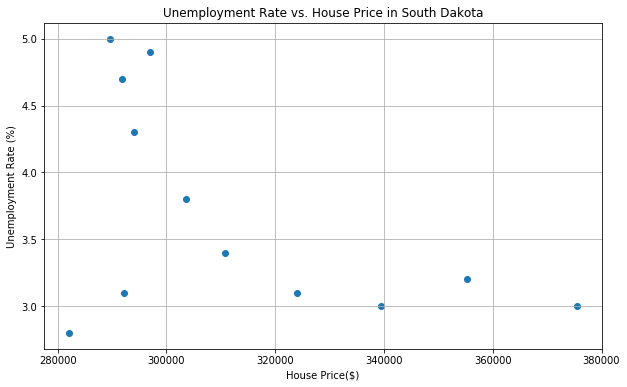

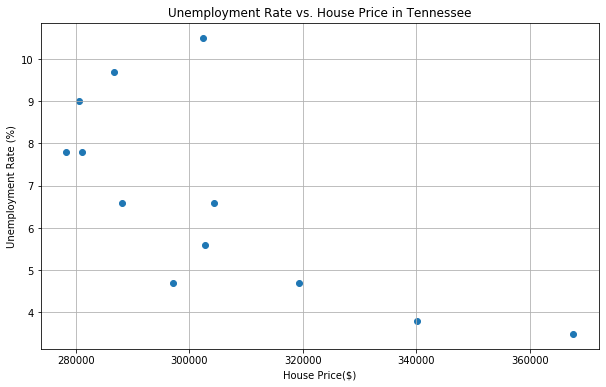

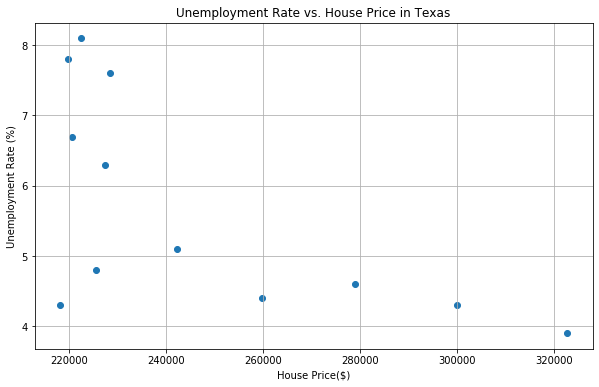

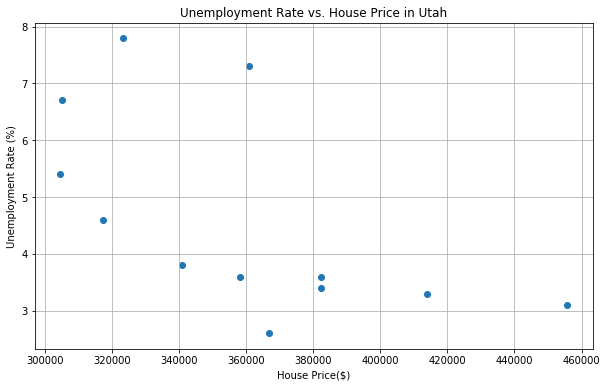

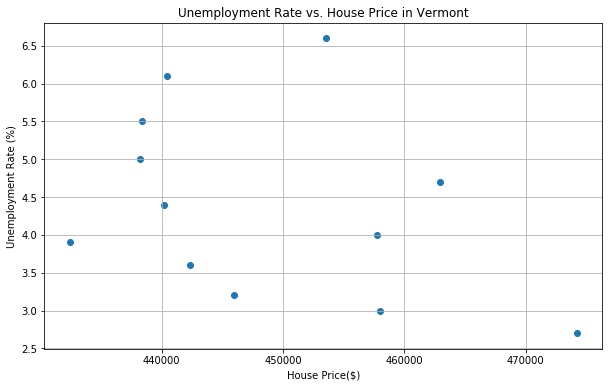

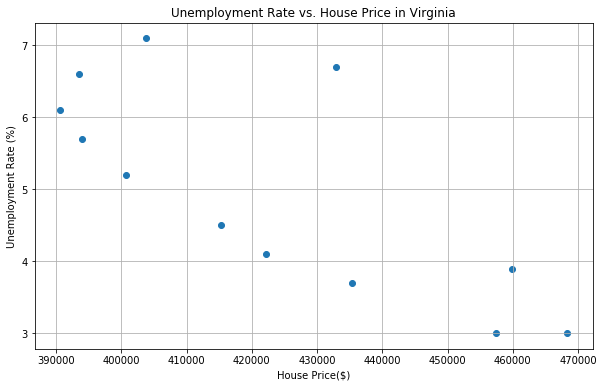

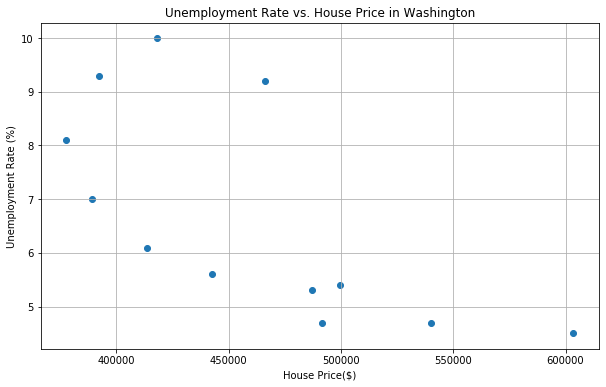

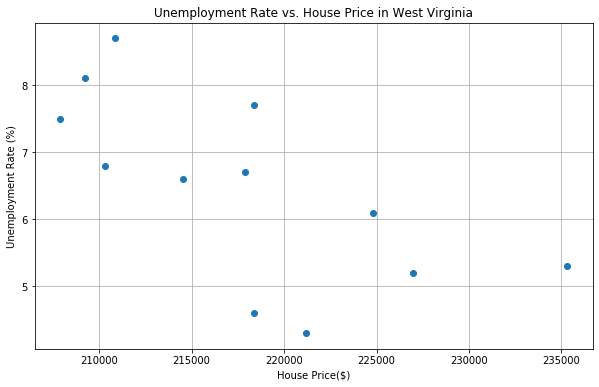

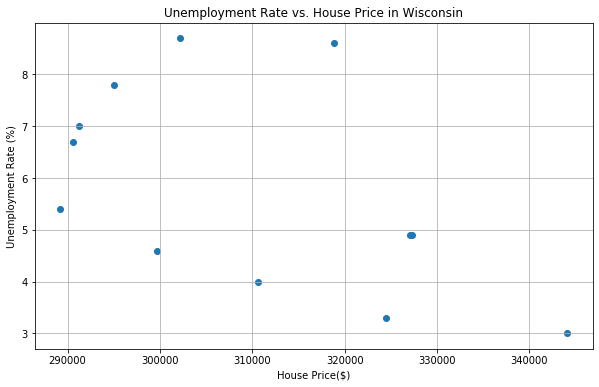

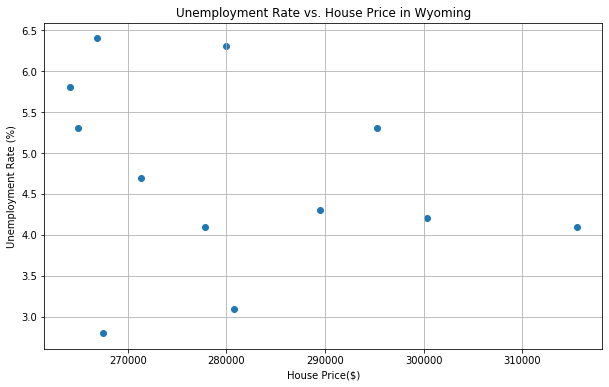

In [169]:
for x in states:
    plt.figure(figsize=(10,6))
    plt.scatter(states_house_price[f'{x}']['house_price'],unemployment_data_by_state[f'{x}']['unemployment_data'])
    plt.xlabel("House Price($)")
    plt.ylabel("Unemployment Rate (%)")
    plt.grid()
    plt.title(f"Unemployment Rate vs. House Price in {x}")

/Users/jackharvey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


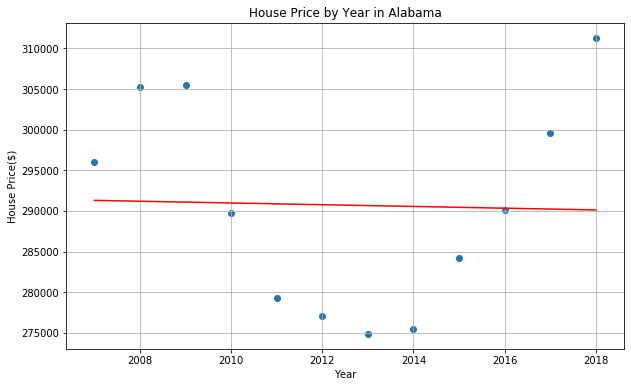

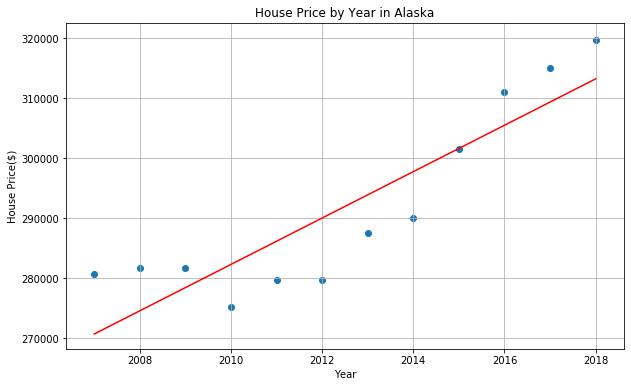

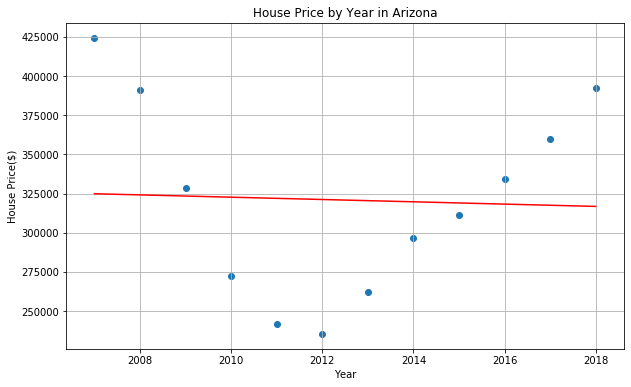

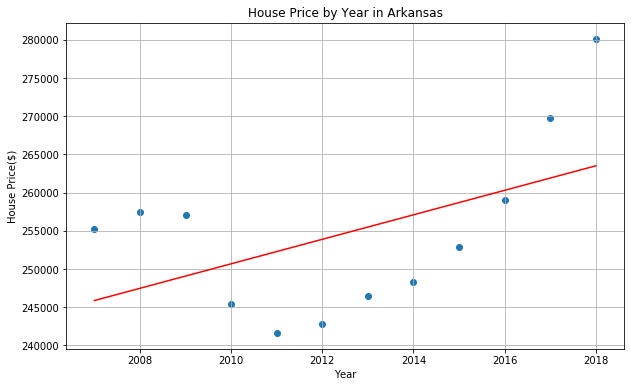

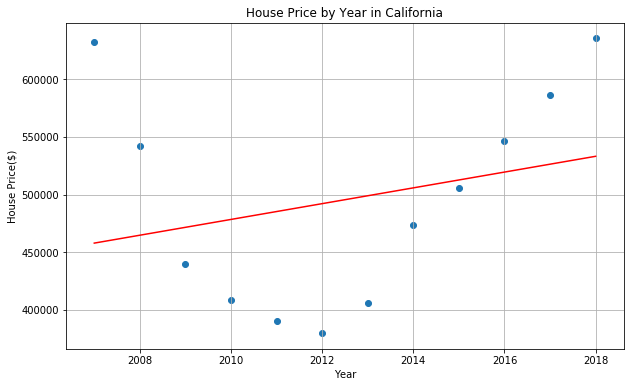

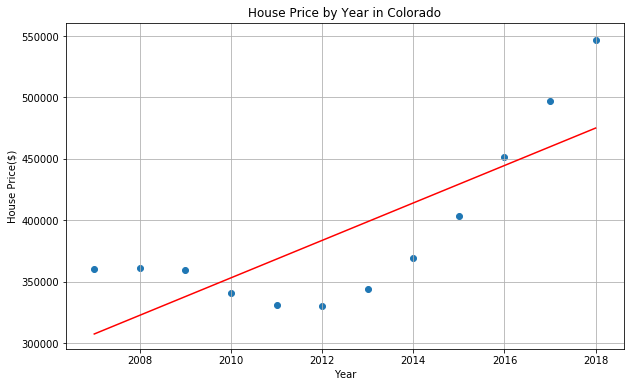

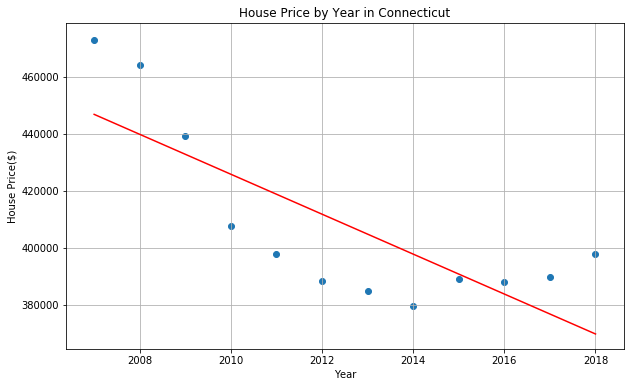

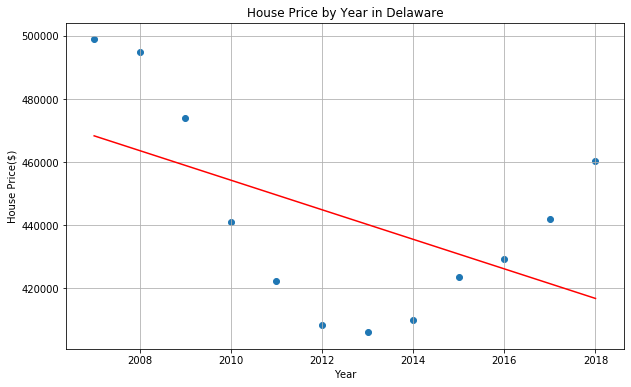

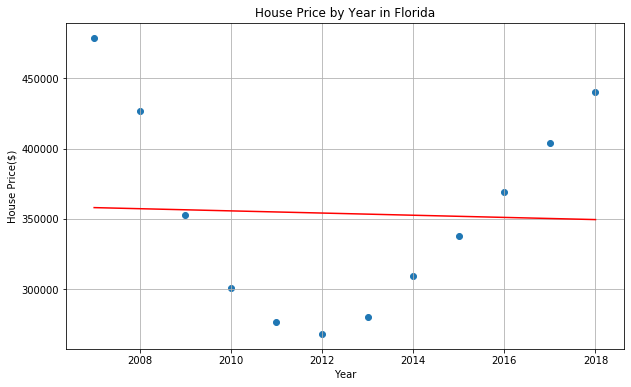

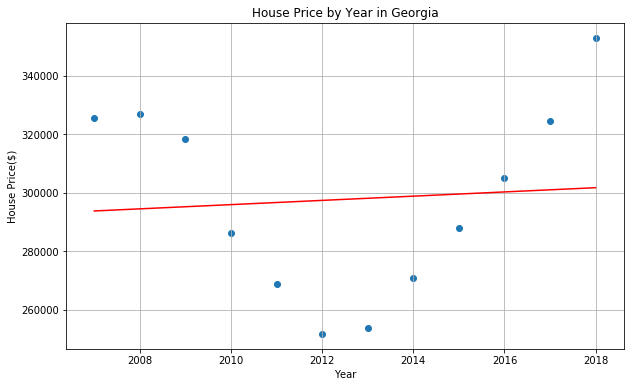

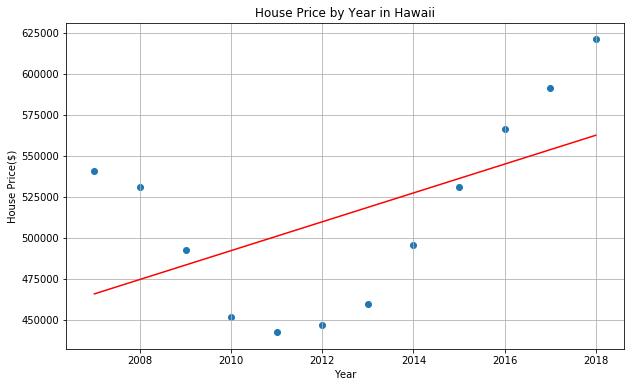

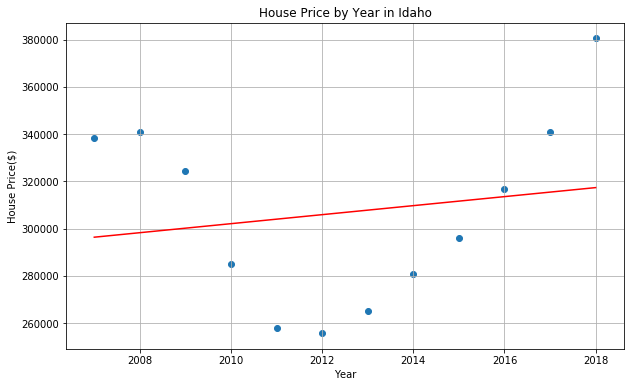

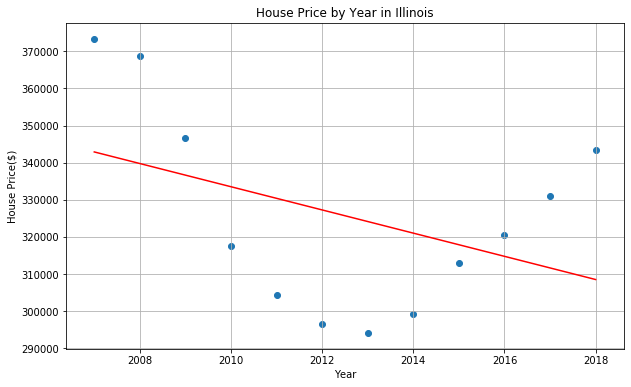

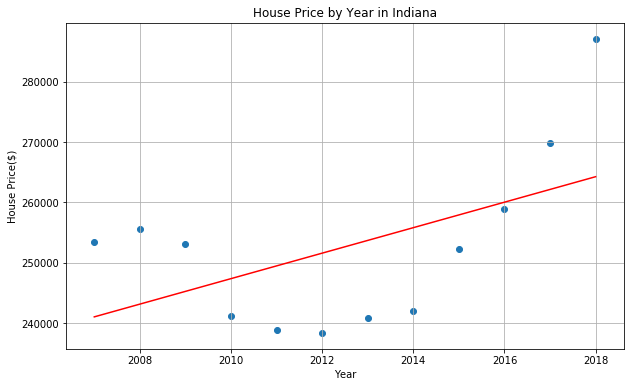

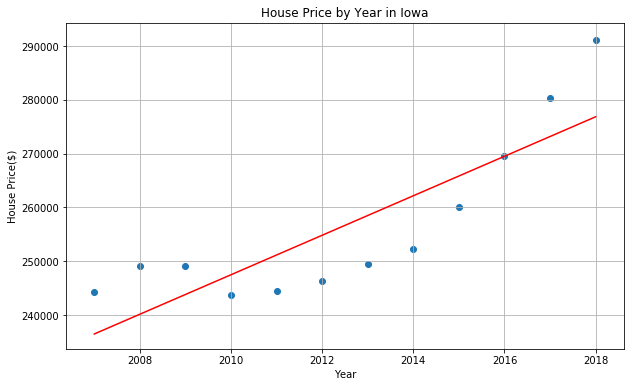

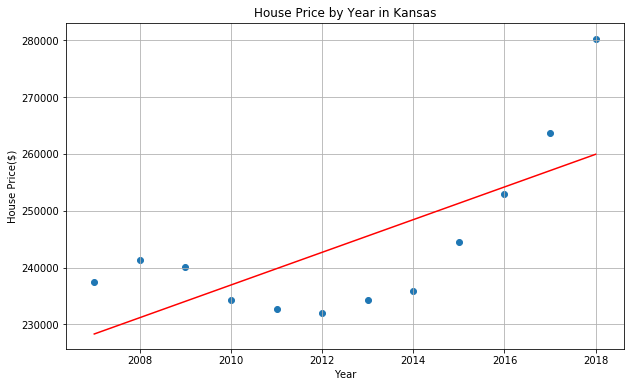

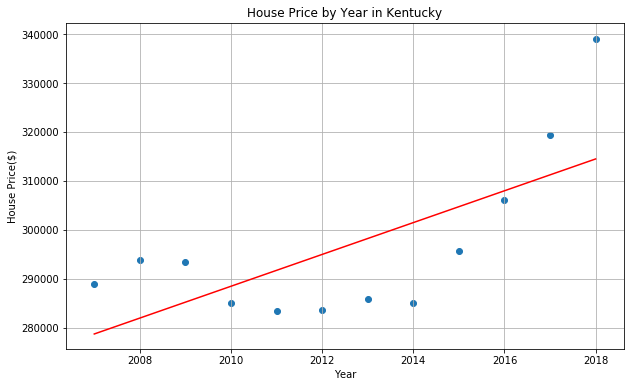

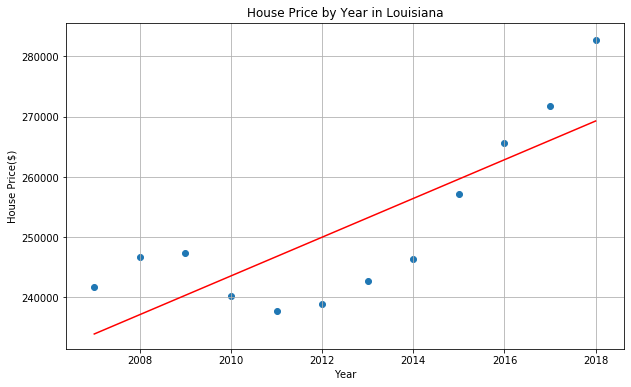

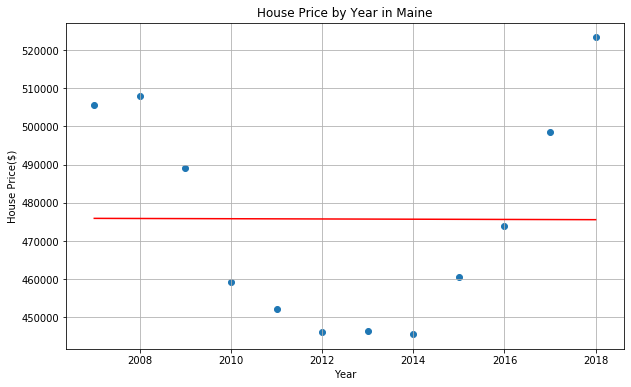

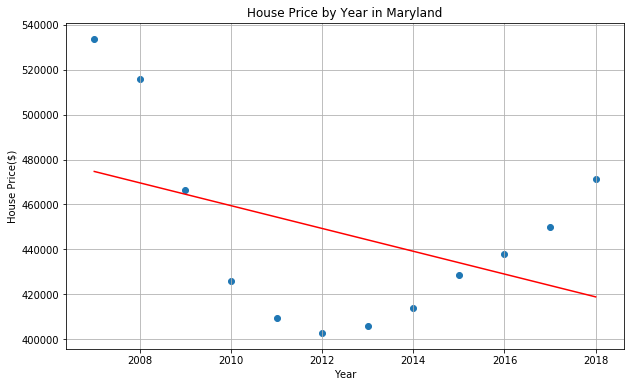

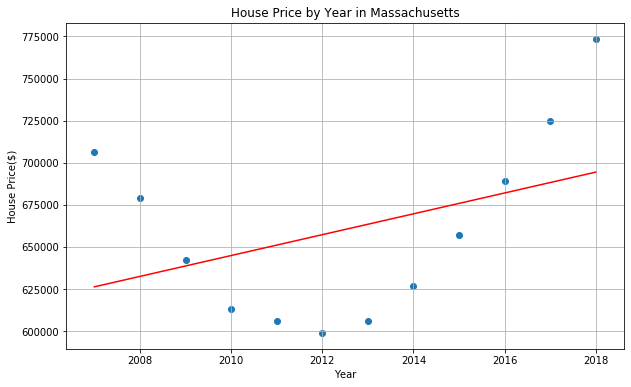

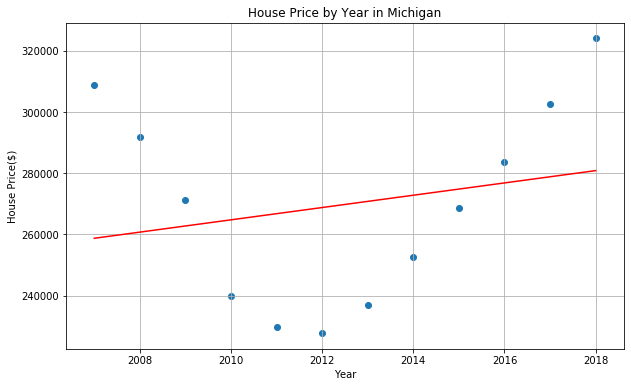

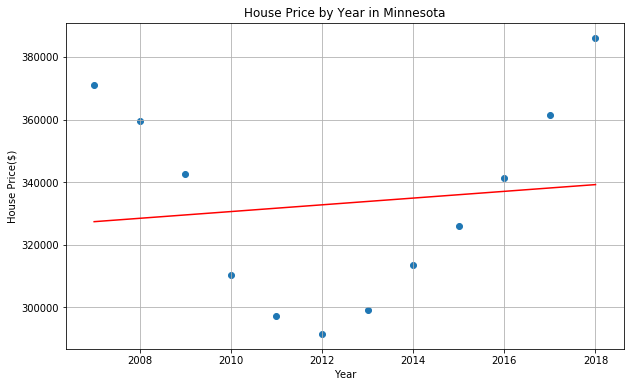

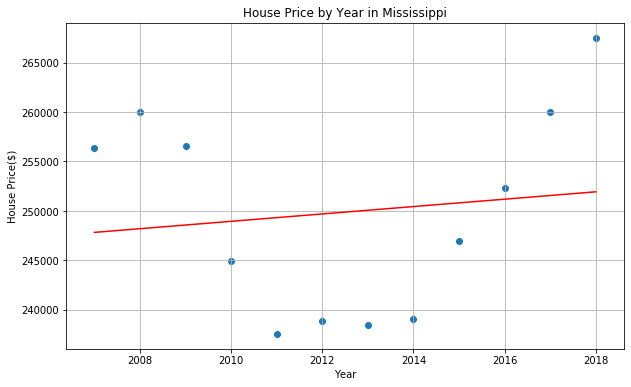

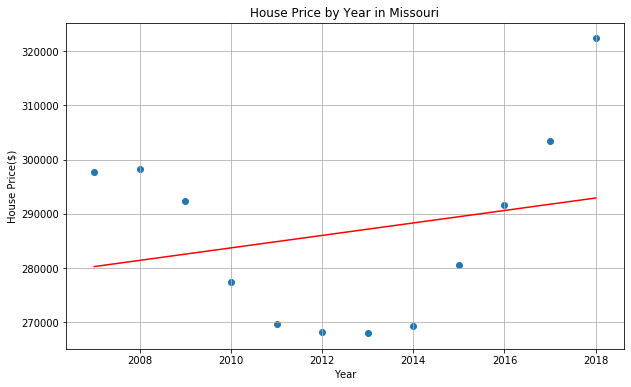

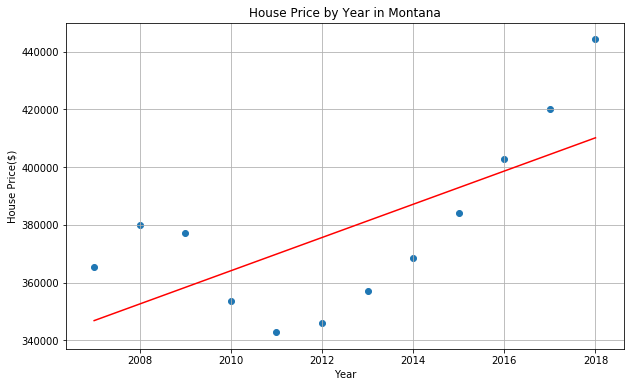

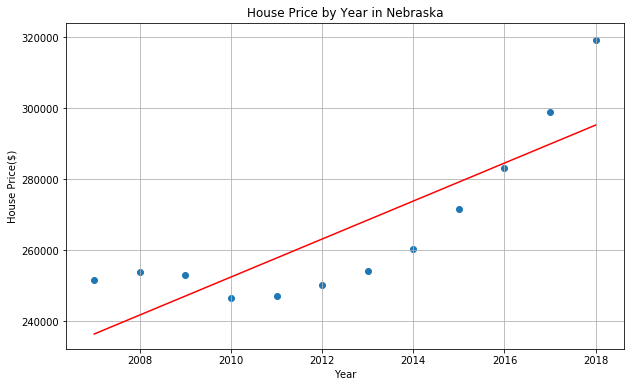

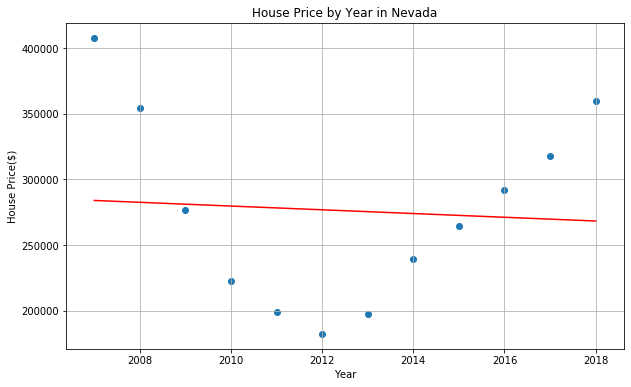

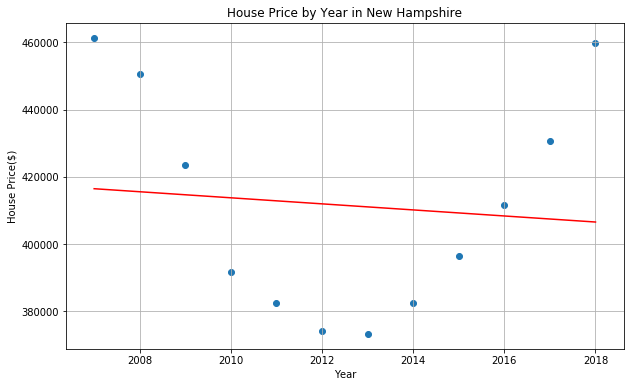

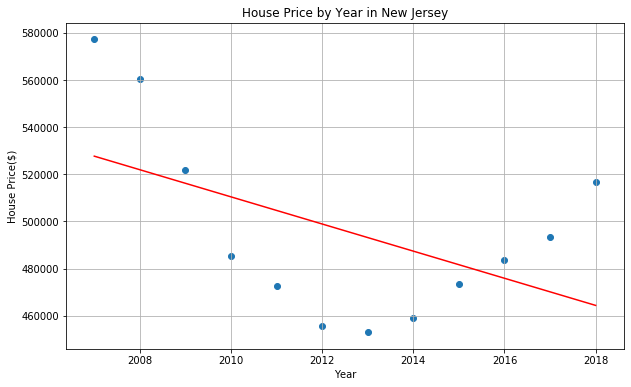

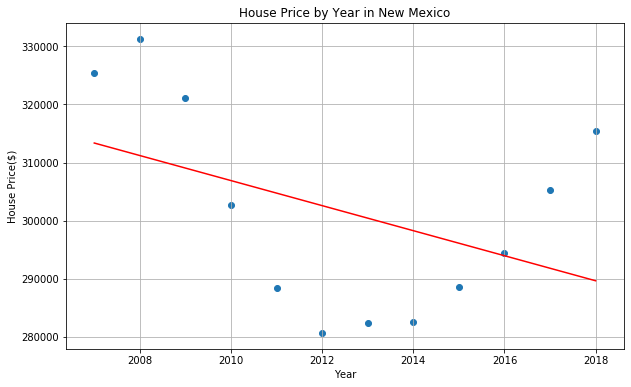

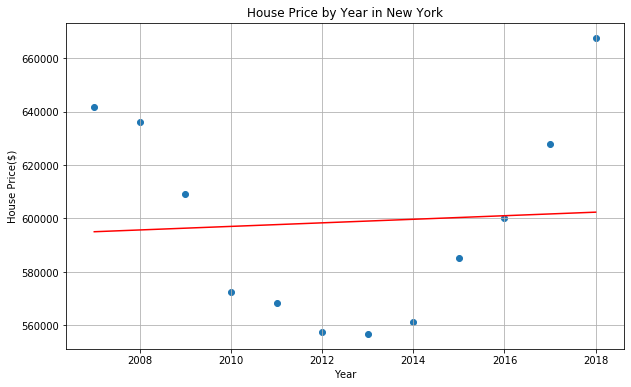

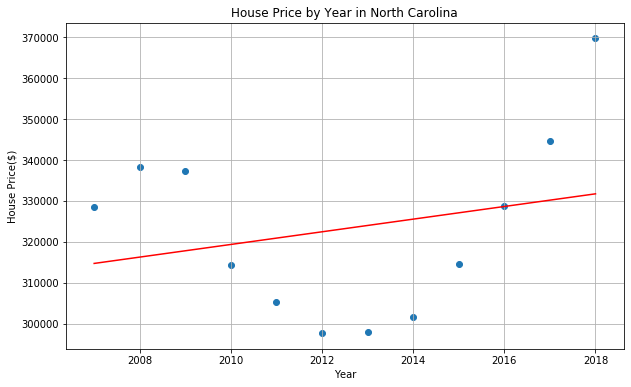

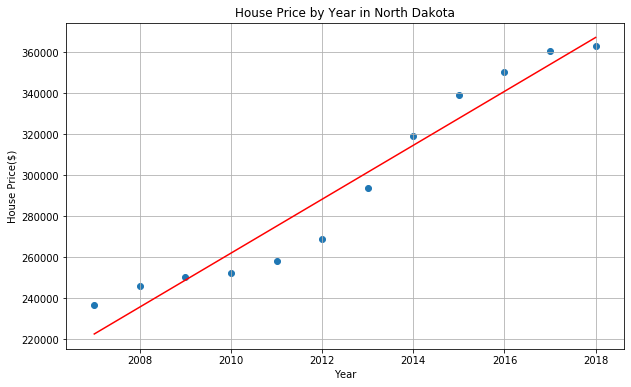

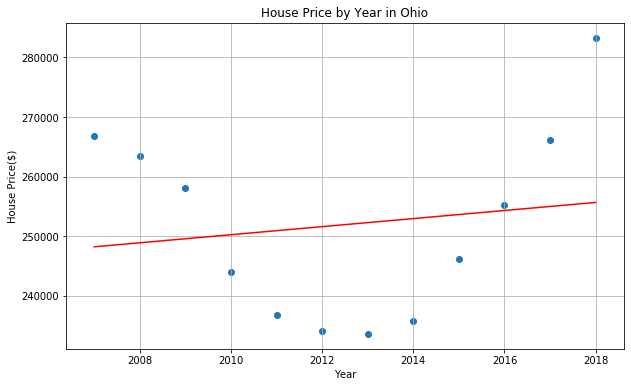

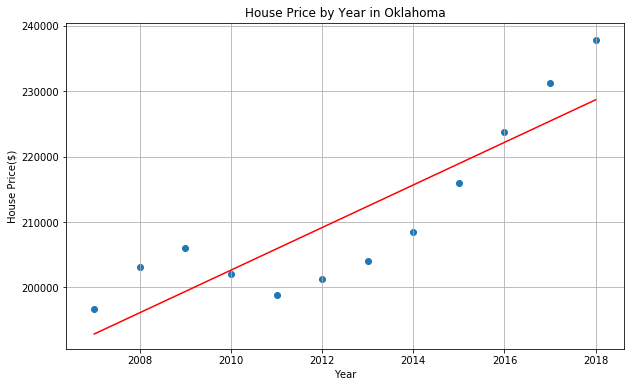

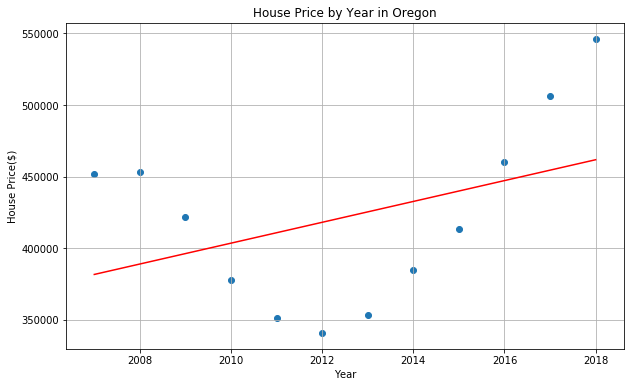

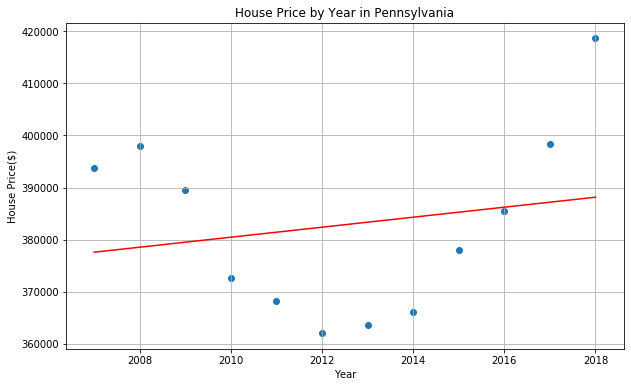

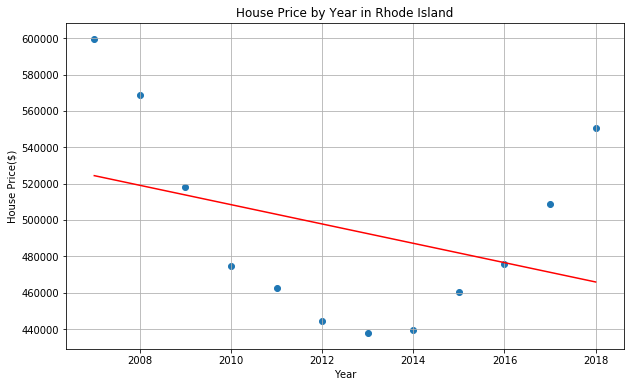

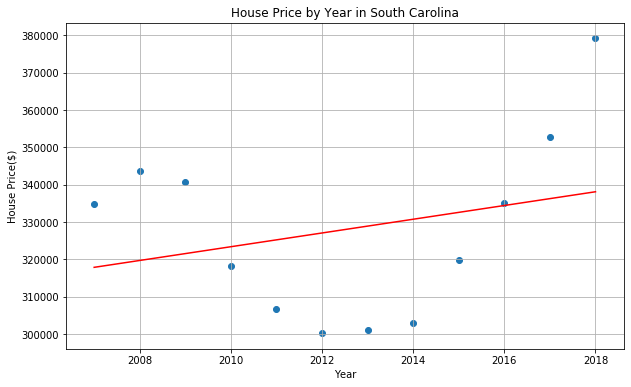

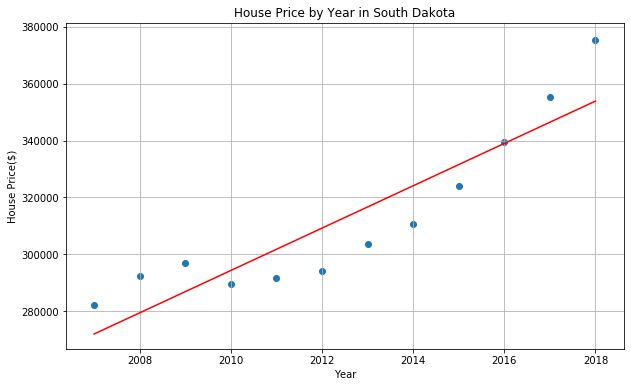

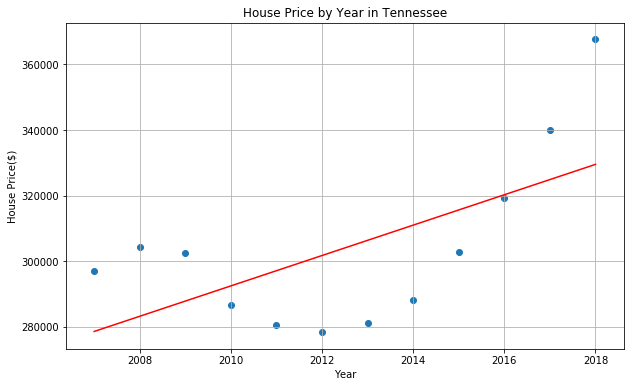

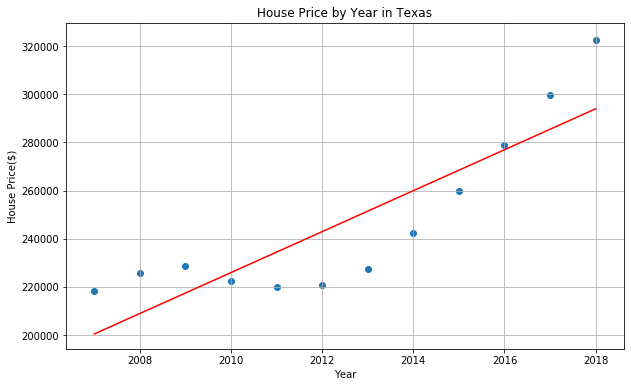

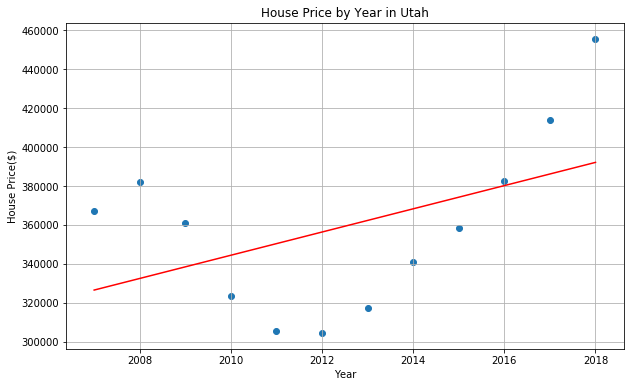

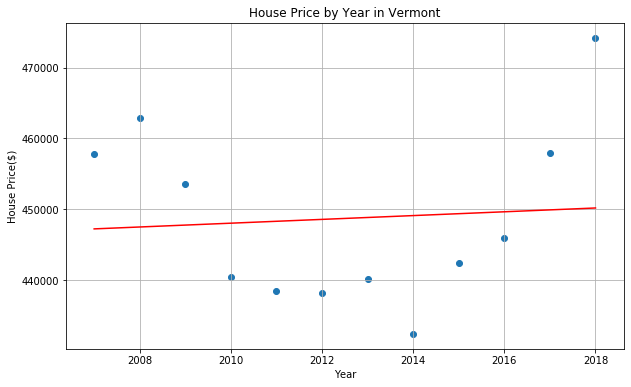

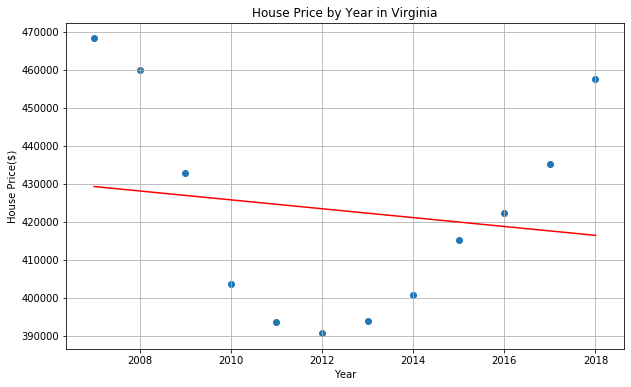

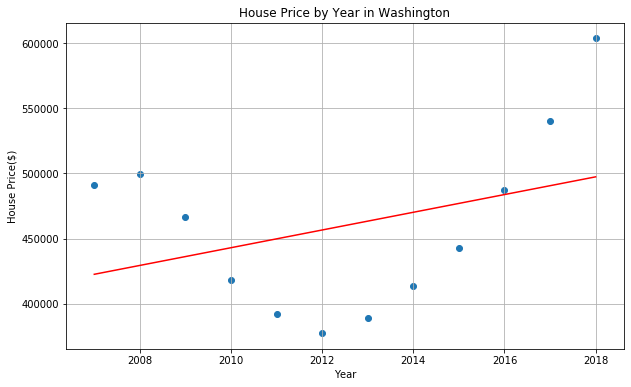

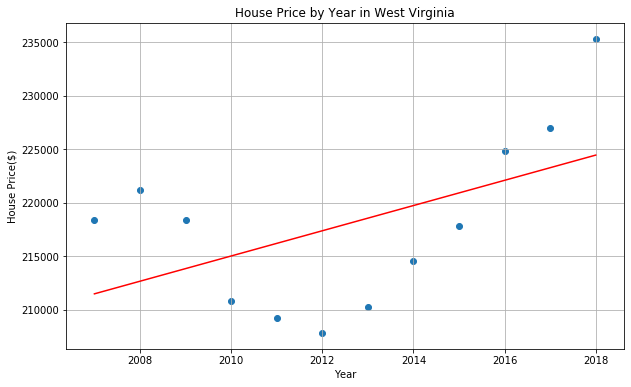

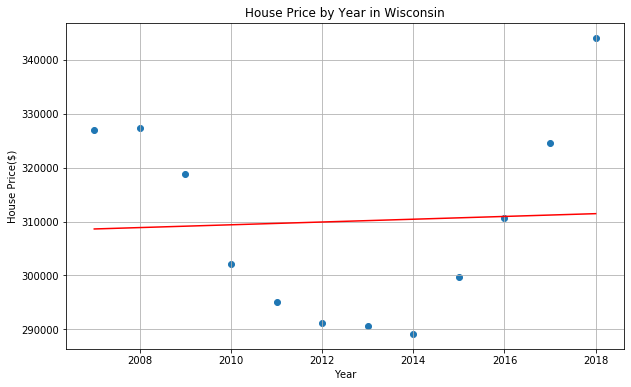

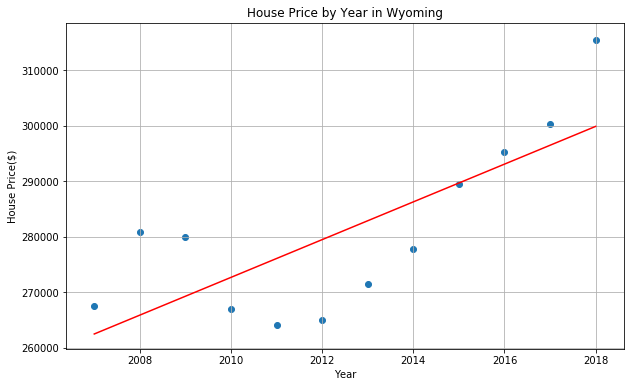

In [170]:
for x in states:
    plt.figure(figsize=(10,6))
    lineregress(years, states_house_price[f'{x}']['house_price'])
    plt.scatter(years,states_house_price[f'{x}']['house_price'])
    plt.title(f"House Price by Year in {x}")
    plt.xlabel("Year")
    plt.ylabel("House Price($)")
    plt.grid()

/Users/jackharvey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


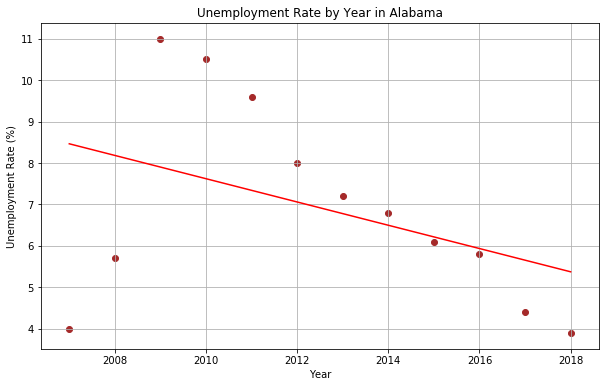

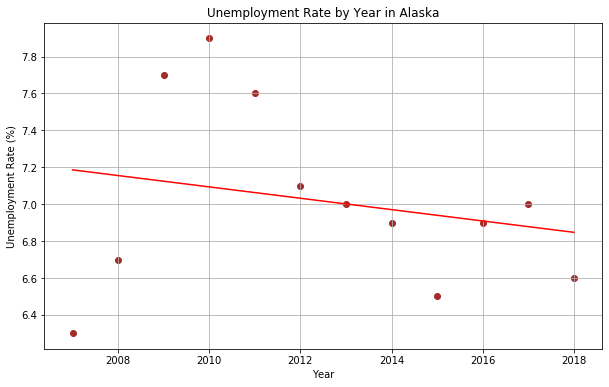

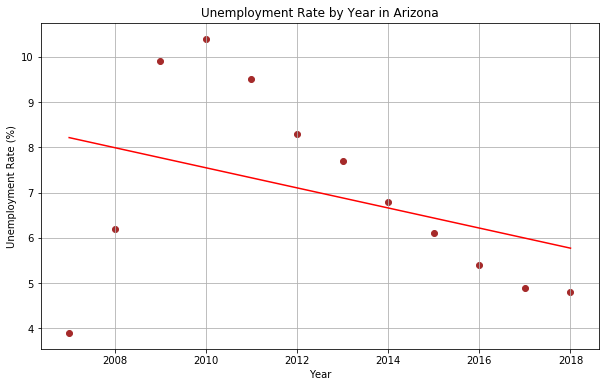

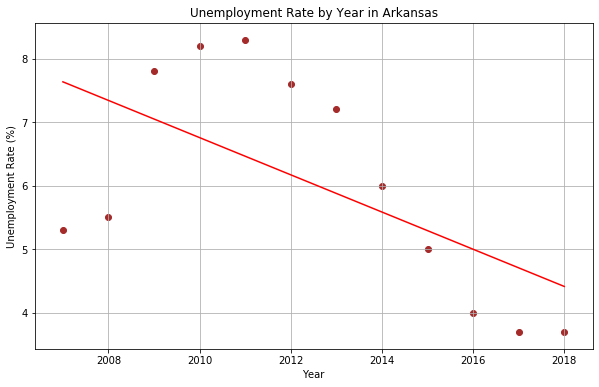

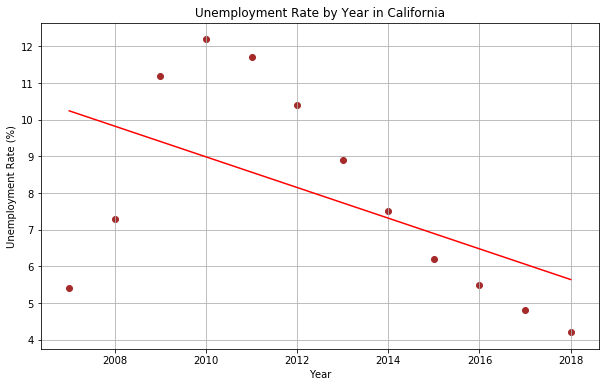

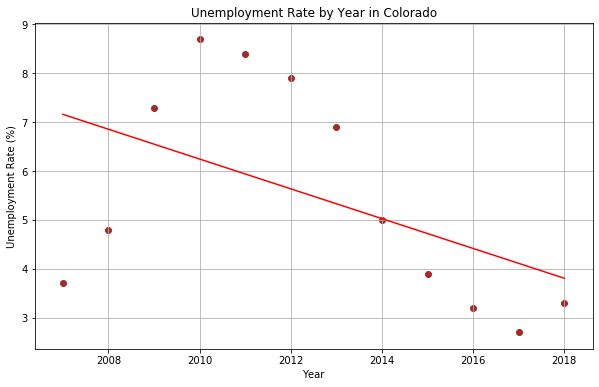

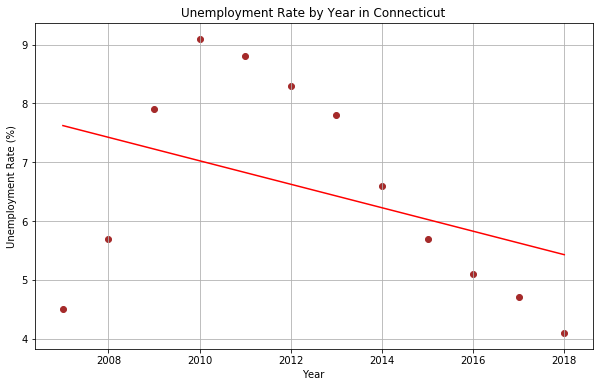

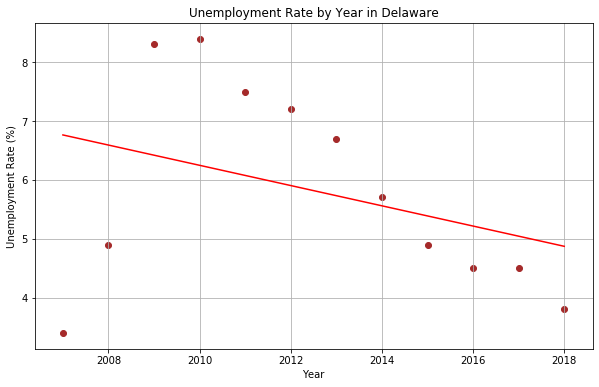

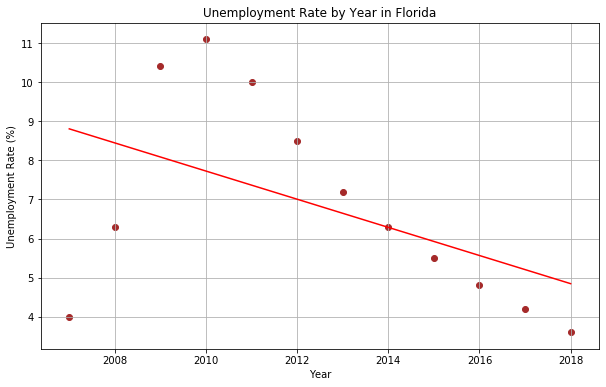

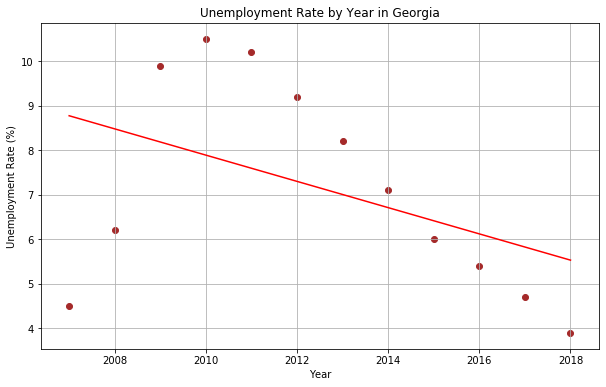

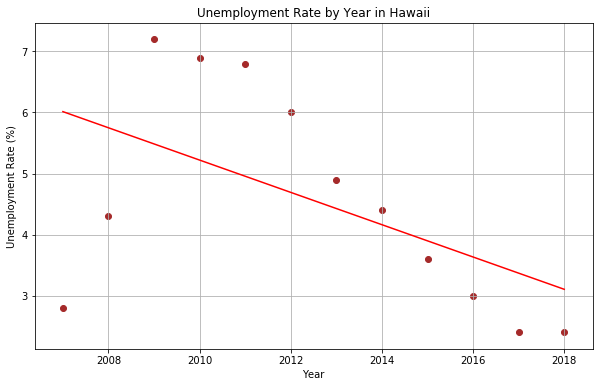

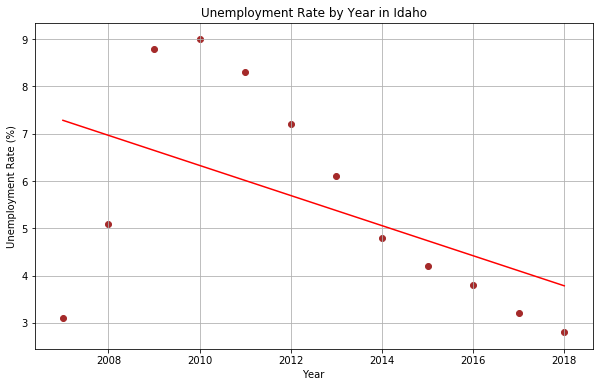

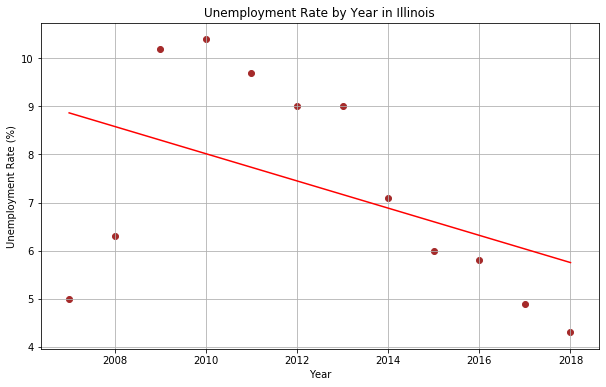

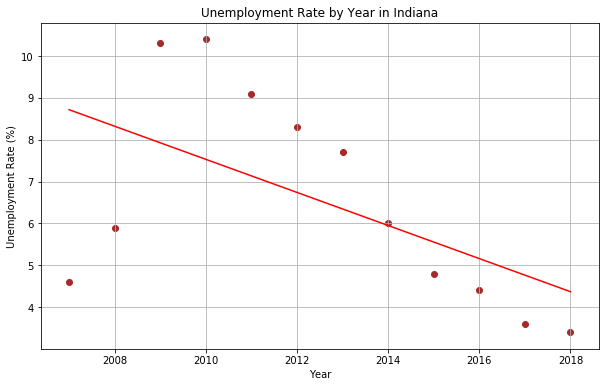

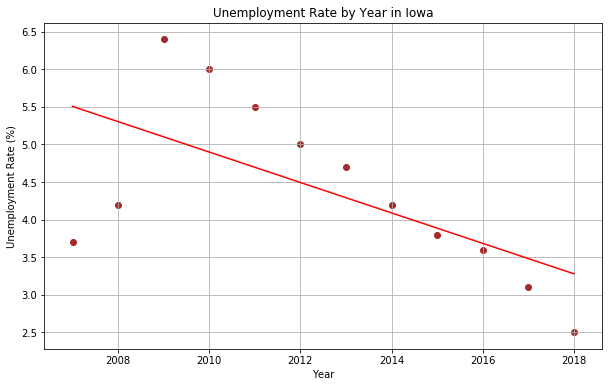

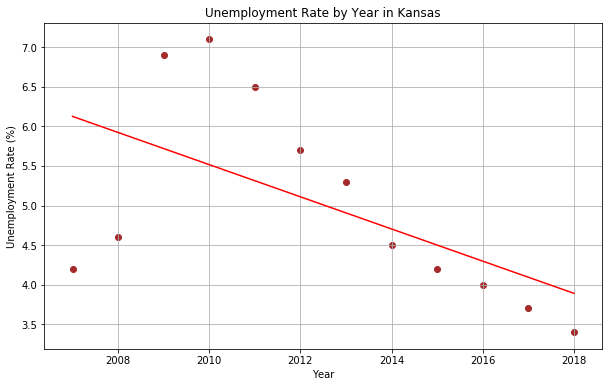

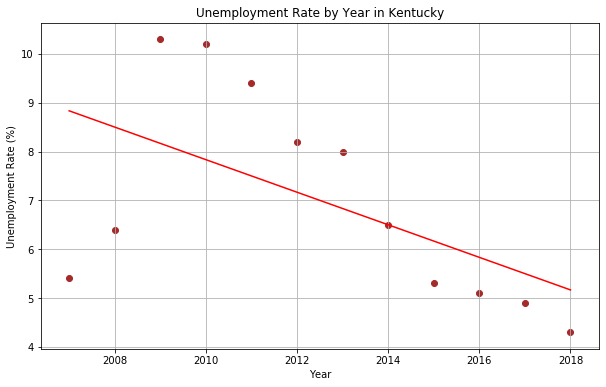

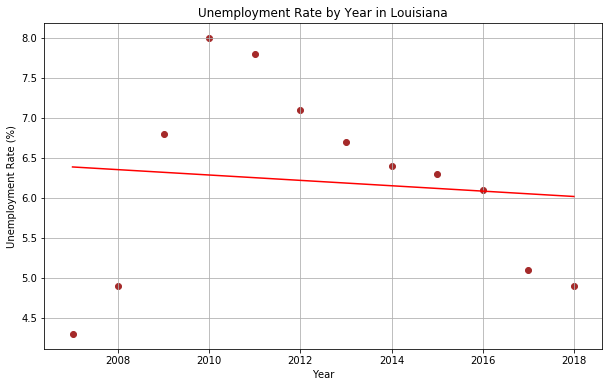

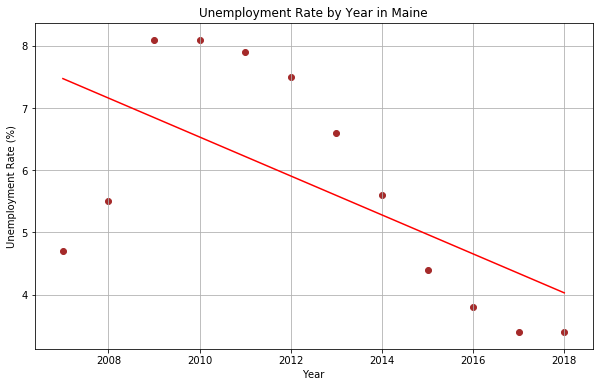

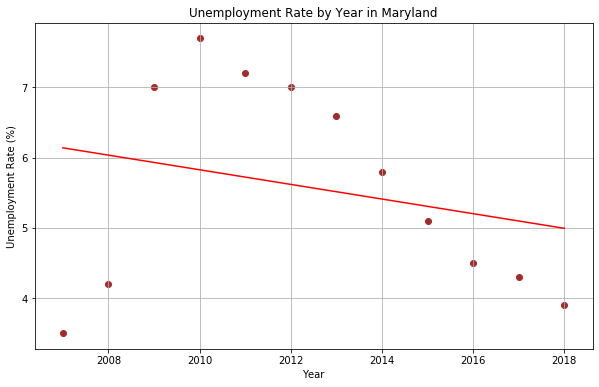

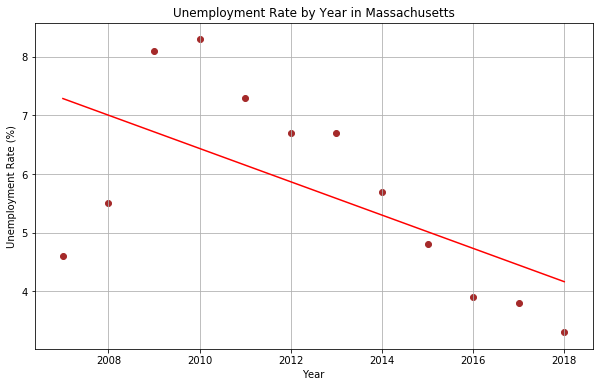

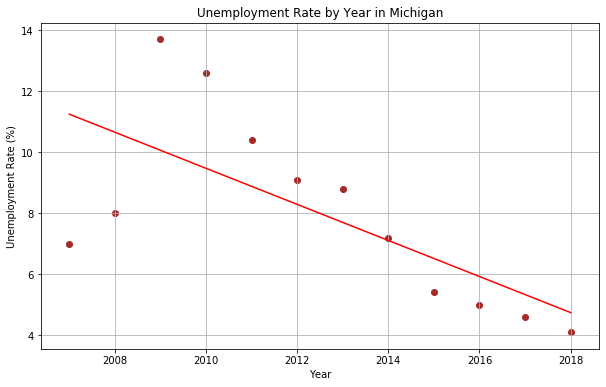

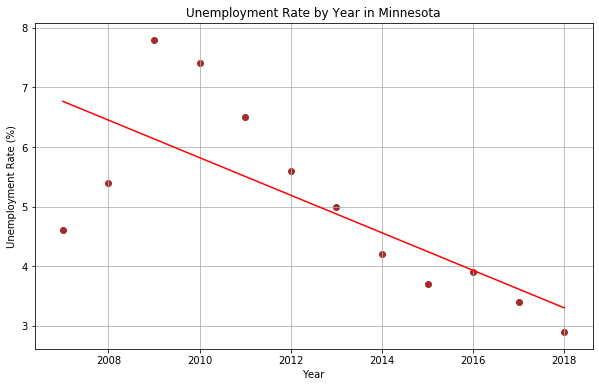

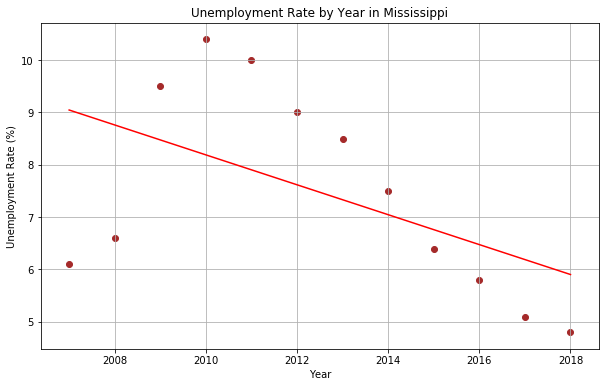

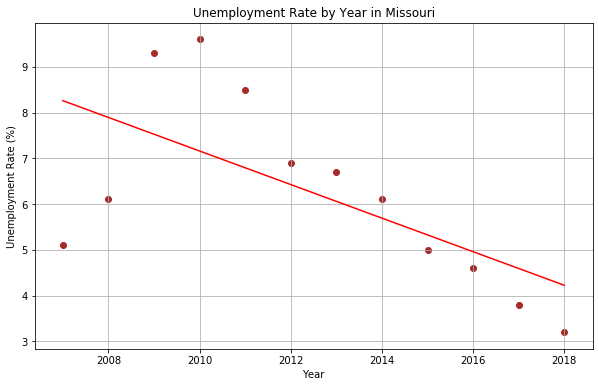

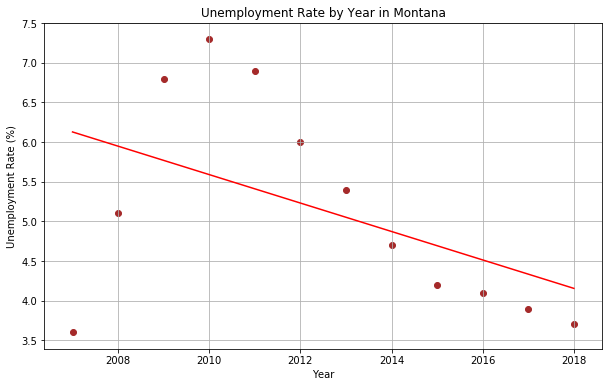

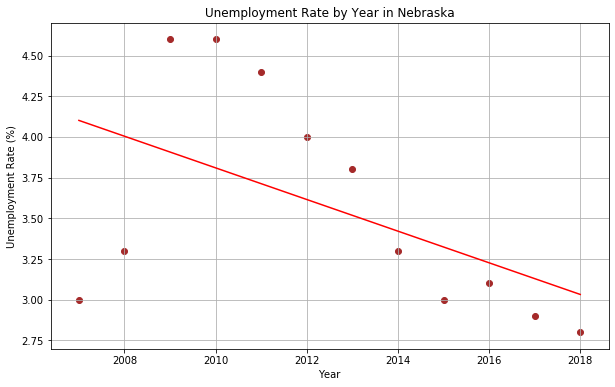

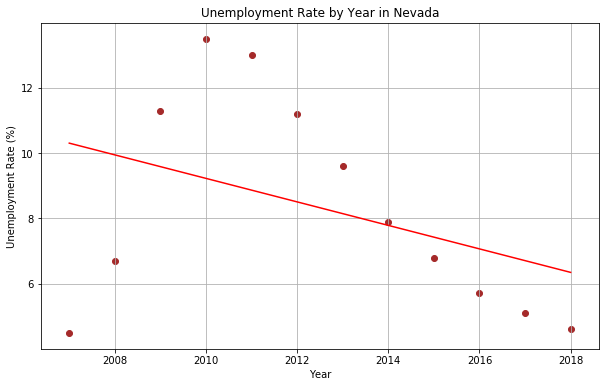

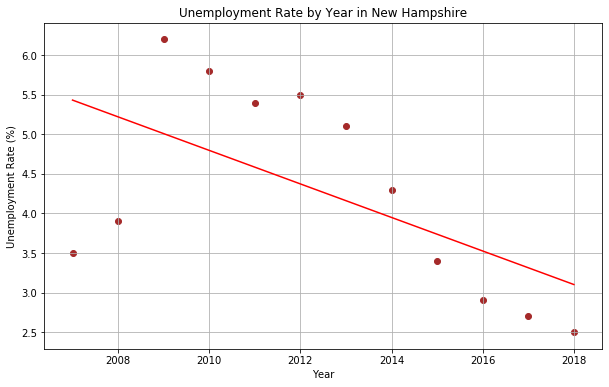

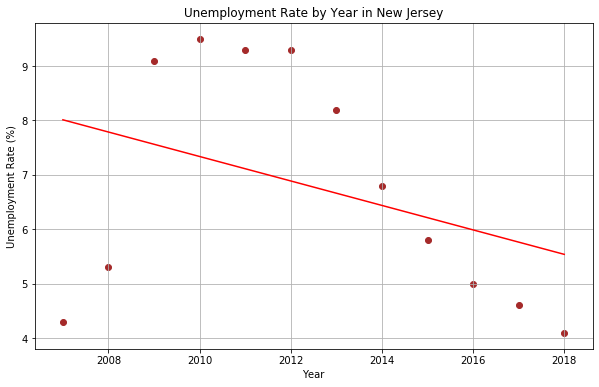

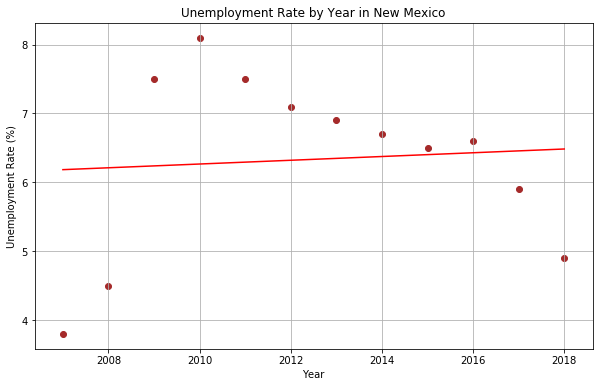

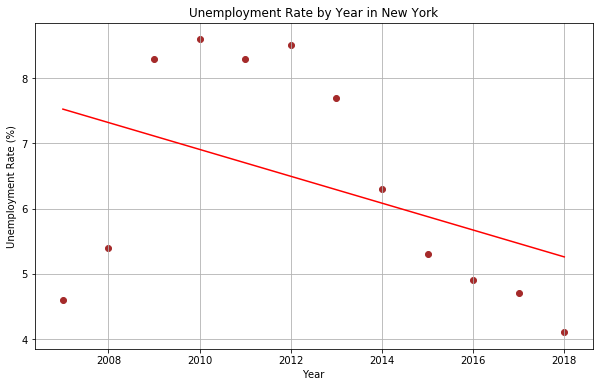

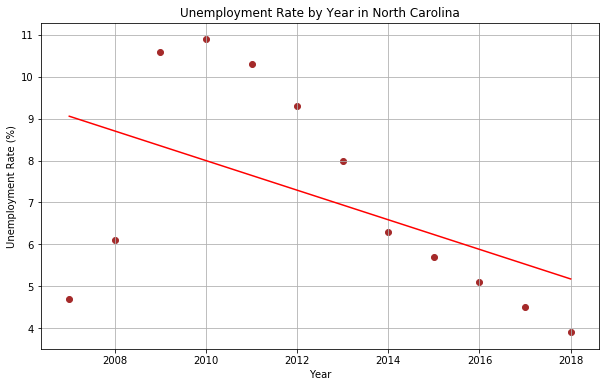

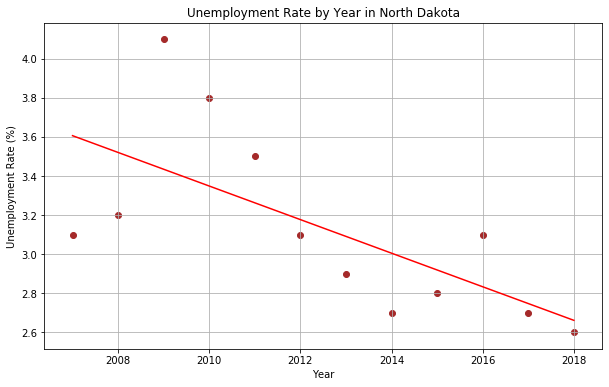

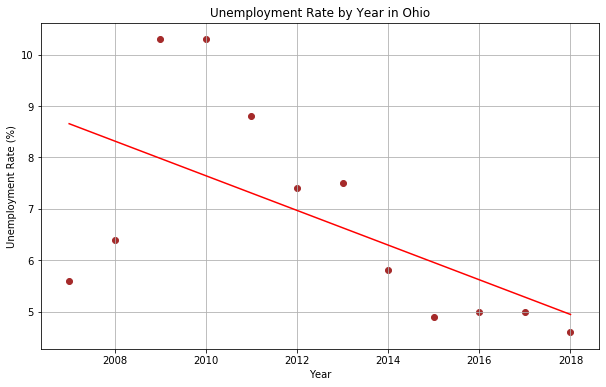

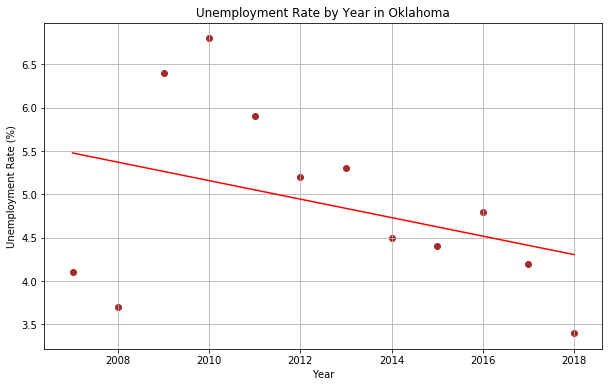

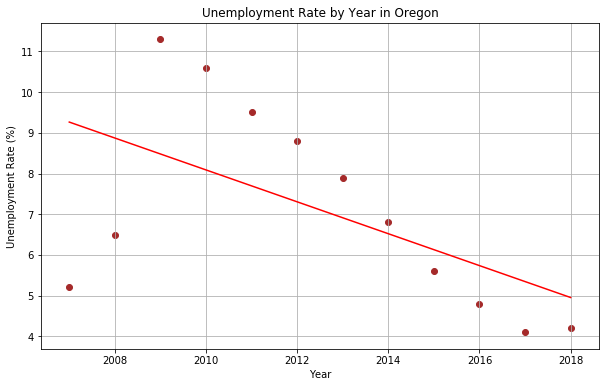

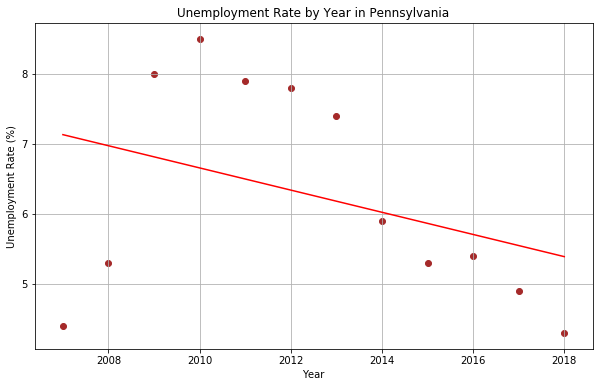

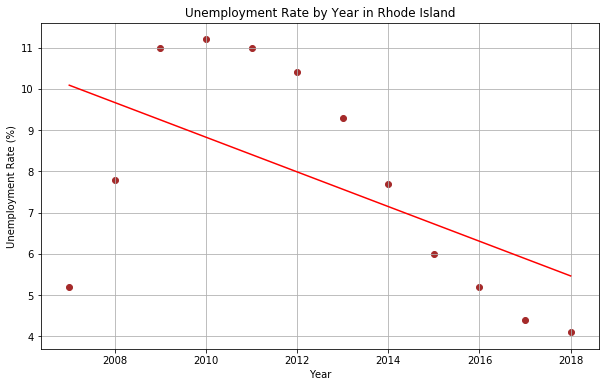

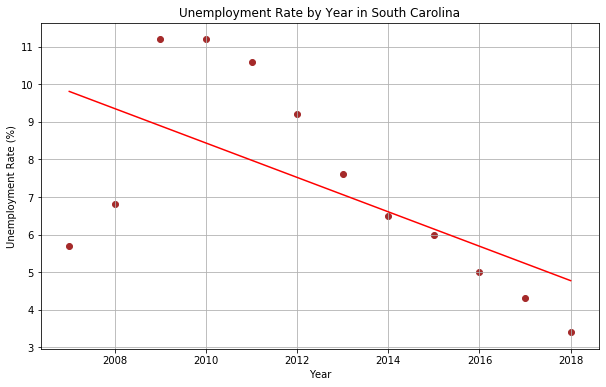

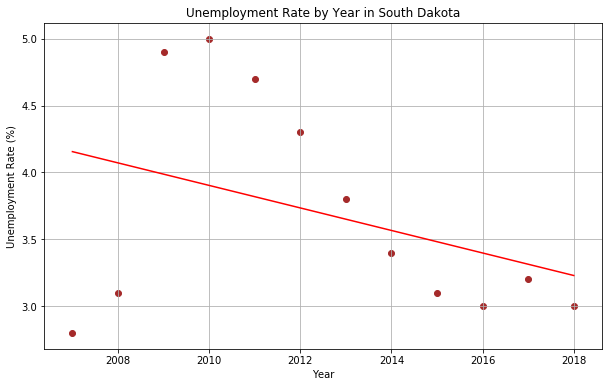

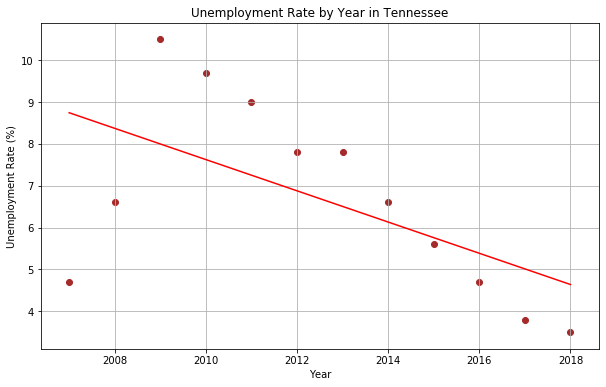

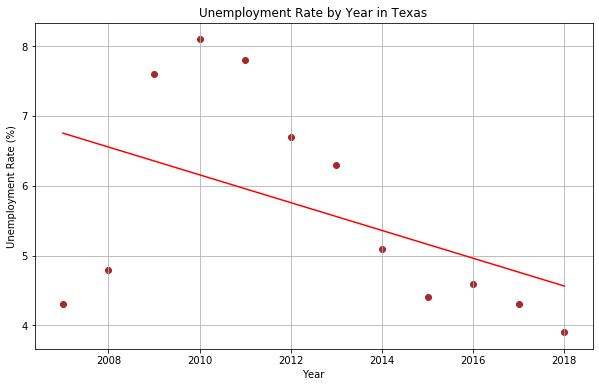

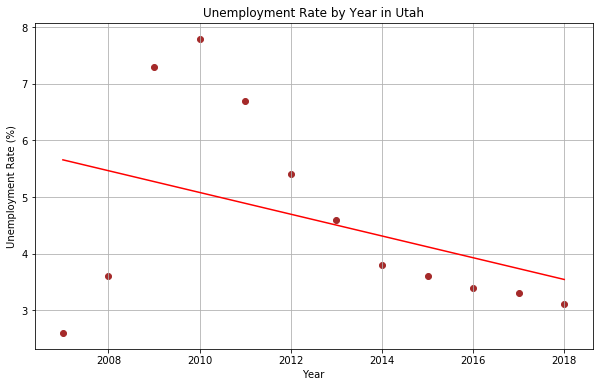

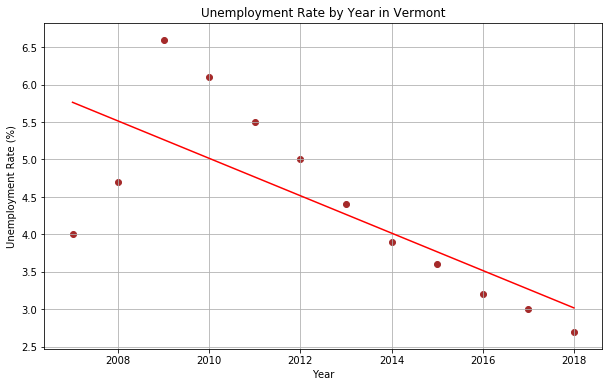

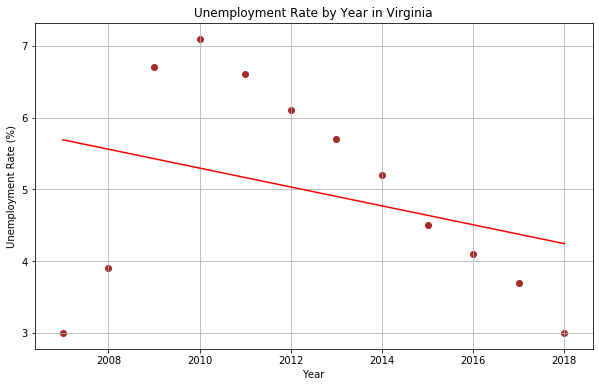

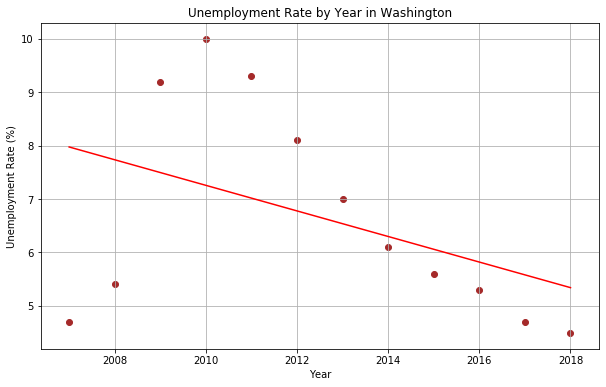

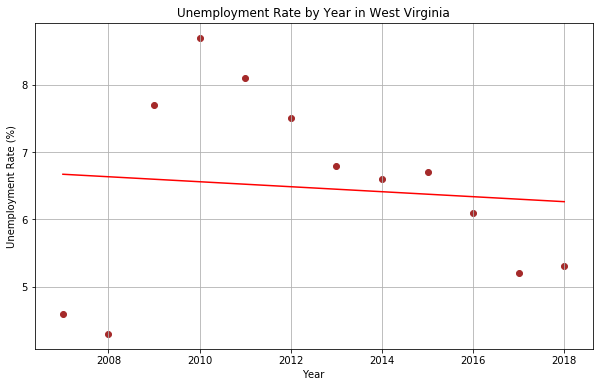

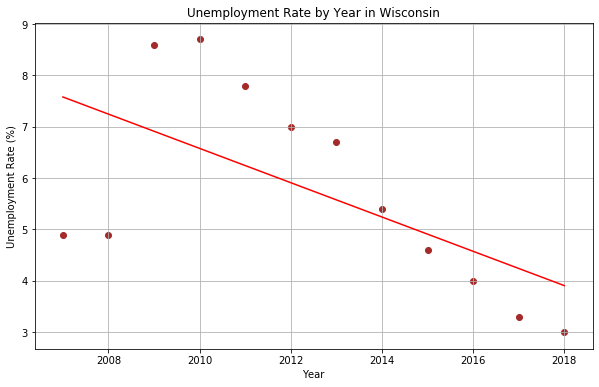

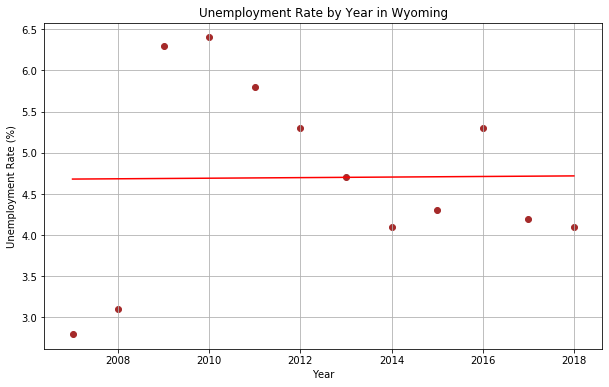

In [173]:
for x in states:
    plt.figure(figsize=(10,6))
    lineregress(years,unemployment_data_by_state[f'{x}']['unemployment_data'])
    plt.scatter(years,unemployment_data_by_state[f'{x}']['unemployment_data'], c='brown')
    plt.title(f"Unemployment Rate by Year in {x}")
    plt.xlabel("Year")
    plt.ylabel("Unemployment Rate (%)")
    plt.grid()